In [1]:
import numpy as np
from numpy import random
import nest
import nest.raster_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import os


text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=16)     # fontsize of the axes title 
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=16)  # fontsize of the figure title


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [15]:
my_path = os.getcwd() # Figures out the absolute path for you in case your working directory moves around.

# Results 4

In [37]:
tones = [100]
n_folder = 4
peaks = [15,40,65,85]
angles = np.arange(-90,100,15)
colors1 = ["magenta", 'crimson', "darkviolet", 'purple']
colors2 = ["green", 'darkgreen', 'forestgreen', "limegreen"]

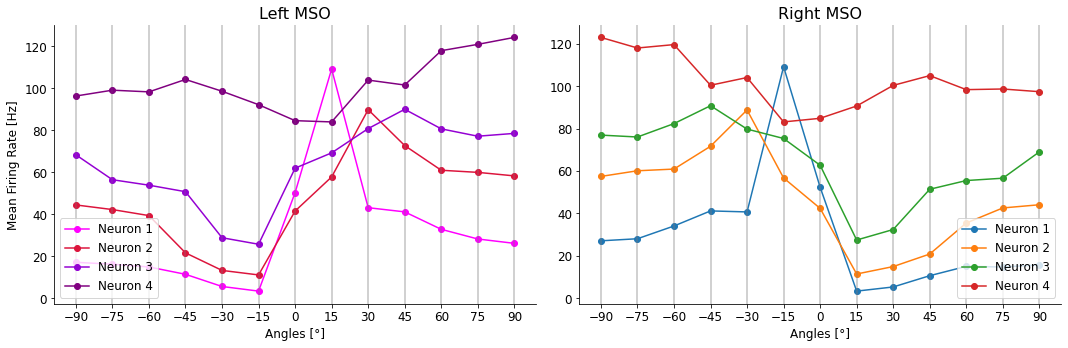

In [38]:

for tone in tones:

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    for peak in peaks:

        path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_peak_{}'.format(n_folder, tone, peak)
        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)


        ax[1].set_title("Right MSO")
        ax[0].set_title("Left MSO")
        #ax[0].set_ylabel("Absolute Spikes")

        ax[1].plot(angles,np.loadtxt(path_r)[1], 'o-', label = "Neuron {}".format(peaks.index(peak)+1))

        ax[0].plot(angles,np.loadtxt(path_l)[1],'o-', color = colors1[peaks.index(peak)], label = "Neuron {}".format(peaks.index(peak)+1)) #colors1[peaks.index(peak)],

        for i in range(len(angles)):
            ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[0].set_xlabel("Angles [°]")
        ax[0].set_ylabel("Mean Firing Rate [Hz]")
        ax[0].set_xticks(angles)
        ax[0].legend(loc = 'lower left')
        ax[0].spines['top'].set_visible(False) 
        ax[0].spines['right'].set_visible(False)

        ax[1].set_xlabel("Angles [°]")

        ax[1].set_xticks(angles)
        ax[1].legend(loc = 'lower right')
        ax[1].spines['top'].set_visible(False) 
        ax[1].spines['right'].set_visible(False)
        fig.tight_layout()
    plt.savefig(my_path+'/images/peaks')

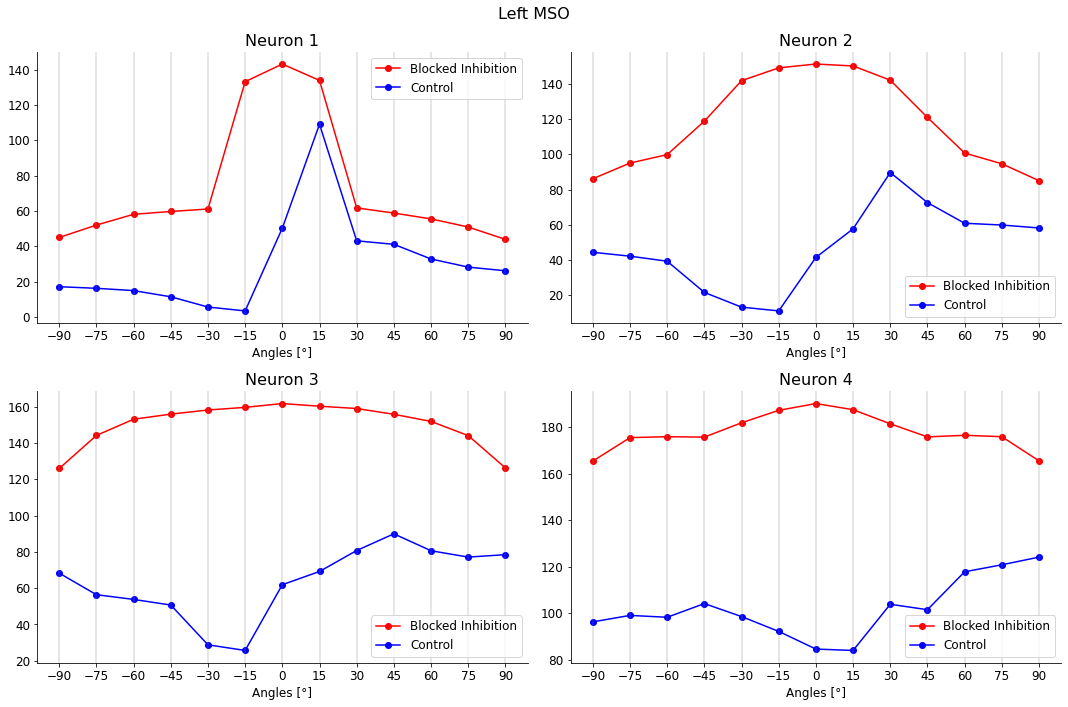

In [81]:
for tone in tones:

    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    
    for peak in peaks:

        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)
        fig.suptitle("Left MSO")

        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].set_title("Neuron {}".format(peaks.index(peak)+1))
        
        for i in range(len(angles)):
            ax[int(peaks.index(peak)/2), peaks.index(peak)%2].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[int(peaks.index(peak)/2), peaks.index(peak)%2].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].set_xlabel("Angles [°]")
        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].set_xticks(angles)
        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].legend()
        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].spines['top'].set_visible(False) 
        ax[int(peaks.index(peak)/2), peaks.index(peak)%2].spines['right'].set_visible(False)
        

        fig.tight_layout()
    plt.savefig('images/blocked_inhibition')

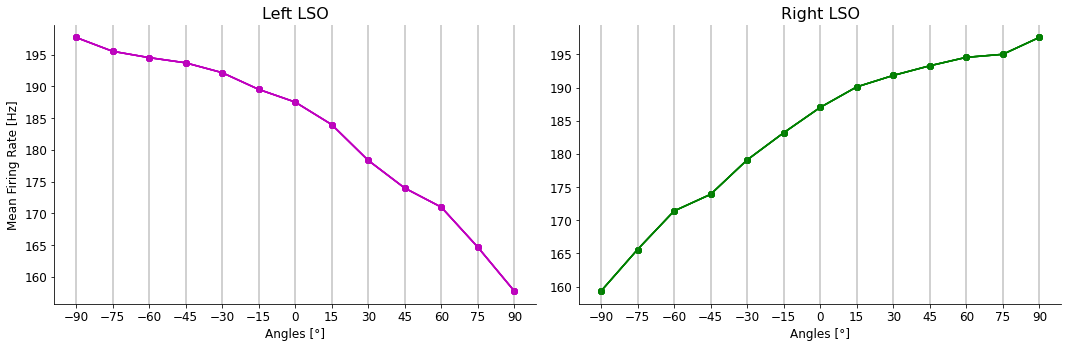

In [57]:
for tone in tones:

    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for peak in peaks:

        path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_peak_{}'.format(n_folder, tone, peak)
        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)


        ax[1].set_title("Right LSO")
        ax[0].set_title("Left LSO")
        #ax[0].set_ylabel("Absolute Spikes")

        ax[1].plot(angles,np.loadtxt(path_r), 'go-')

        ax[0].plot(angles,np.loadtxt(path_l),'mo-')

        for i in range(len(angles)):
            ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[0].set_xlabel("Angles [°]")
        ax[0].set_ylabel("Mean Firing Rate [Hz]")
        ax[0].set_xticks(angles)
        ax[0].spines['top'].set_visible(False) 
        ax[0].spines['right'].set_visible(False)

        ax[1].set_xlabel("Angles [°]")

        ax[1].set_xticks(angles)
        ax[1].spines['top'].set_visible(False) 
        ax[1].spines['right'].set_visible(False)
        fig.tight_layout()
    #plt.savefig('all')

# Results 3

In [46]:
tones = [100]
n_folder = 3
peaks = [15,40,65,85]
angles = np.arange(-90,100,15)
colors1 = ["magenta", 'crimson', "darkviolet", 'purple']
colors2 = ["green", 'darkgreen', 'forestgreen', "limegreen"]

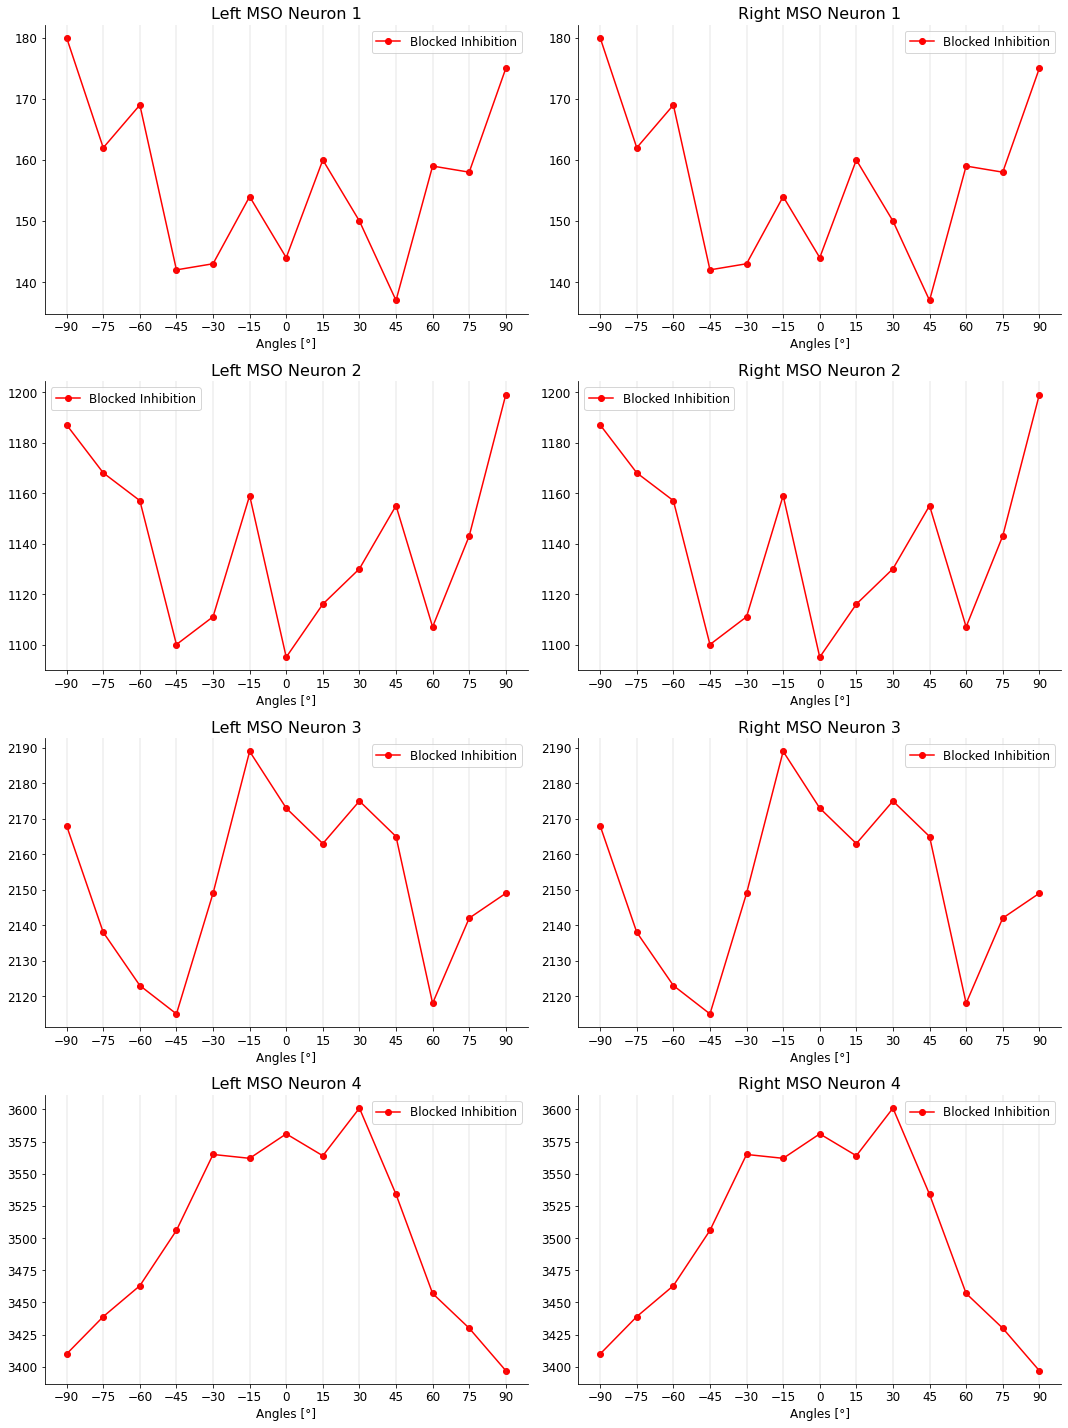

In [50]:
for tone in tones:

    fig, ax = plt.subplots(4, 2, figsize=(15,20))
    
    for peak in peaks:

        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)
        path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_peak_{}'.format(n_folder, tone, peak)
        

        ax[int(peaks.index(peak)), 0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
        #ax[int(peaks.index(peak)), 0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")
        ax[int(peaks.index(peak)), 1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
        #ax[int(peaks.index(peak)), 1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")

        ax[int(peaks.index(peak)), 0].set_title("Left MSO Neuron {}".format(peaks.index(peak)+1))
        ax[int(peaks.index(peak)), 1].set_title("Right MSO Neuron {}".format(peaks.index(peak)+1))
        
        for i in range(len(angles)):
            ax[int(peaks.index(peak)), 0].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[int(peaks.index(peak)), 1].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[int(peaks.index(peak)), 0].set_xlabel("Angles [°]")
        ax[int(peaks.index(peak)), 0].set_xticks(angles)
        ax[int(peaks.index(peak)), 0].legend()
        ax[int(peaks.index(peak)), 0].spines['top'].set_visible(False) 
        ax[int(peaks.index(peak)), 0].spines['right'].set_visible(False)
        ax[int(peaks.index(peak)), 1].set_xlabel("Angles [°]")
        ax[int(peaks.index(peak)), 1].set_xticks(angles)
        ax[int(peaks.index(peak)), 1].legend()
        ax[int(peaks.index(peak)), 1].spines['top'].set_visible(False) 
        ax[int(peaks.index(peak)), 1].spines['right'].set_visible(False)
        

        fig.tight_layout()
    plt.savefig('images/blocked_inhibition')

# Results 1

In [32]:
tones = [100]
n_folder = 1
peaks = [15,40,65,85]
colors1 = ["magenta", 'crimson', "darkviolet", 'purple']
colors2 = ["green", 'darkgreen', 'forestgreen', "limegreen"]
angles = np.arange(-90,100,15)

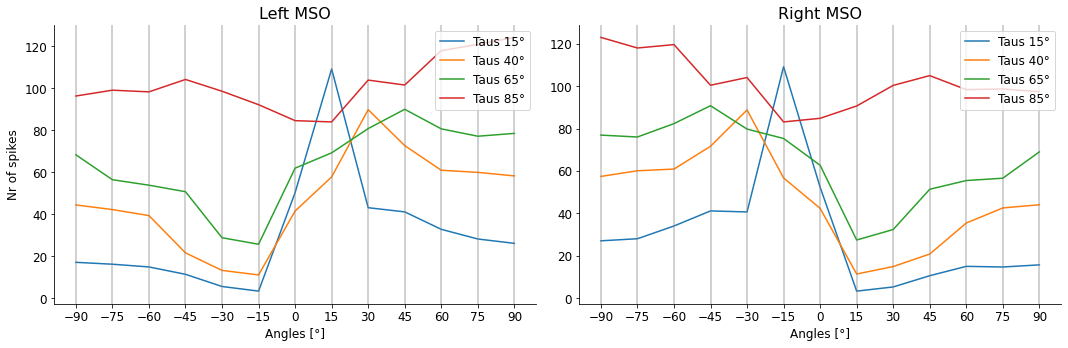

In [30]:
for tone in tones:

    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for peak in peaks:

        path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_peak_{}'.format(n_folder, tone, peak)
        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)


        ax[1].set_title("Right MSO")
        ax[0].set_title("Left MSO")
        #ax[0].set_ylabel("Absolute Spikes")

        ax[1].plot(angles,np.loadtxt(path_r)[1], label = "Taus {}°".format(peak))

        ax[0].plot(angles,np.loadtxt(path_l)[1], label = "Taus {}°".format(peak)) #colors1[peaks.index(peak)],

        for i in range(len(angles)):
            ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[0].set_xlabel("Angles [°]")
        ax[0].set_ylabel("Nr of spikes")
        ax[0].set_xticks(angles)
        ax[0].legend()
        ax[0].spines['top'].set_visible(False) 
        ax[0].spines['right'].set_visible(False)

        ax[1].set_xlabel("Angles [°]")

        ax[1].set_xticks(angles)
        ax[1].legend()
        ax[1].spines['top'].set_visible(False) 
        ax[1].spines['right'].set_visible(False)
        fig.tight_layout()
    plt.savefig('all')

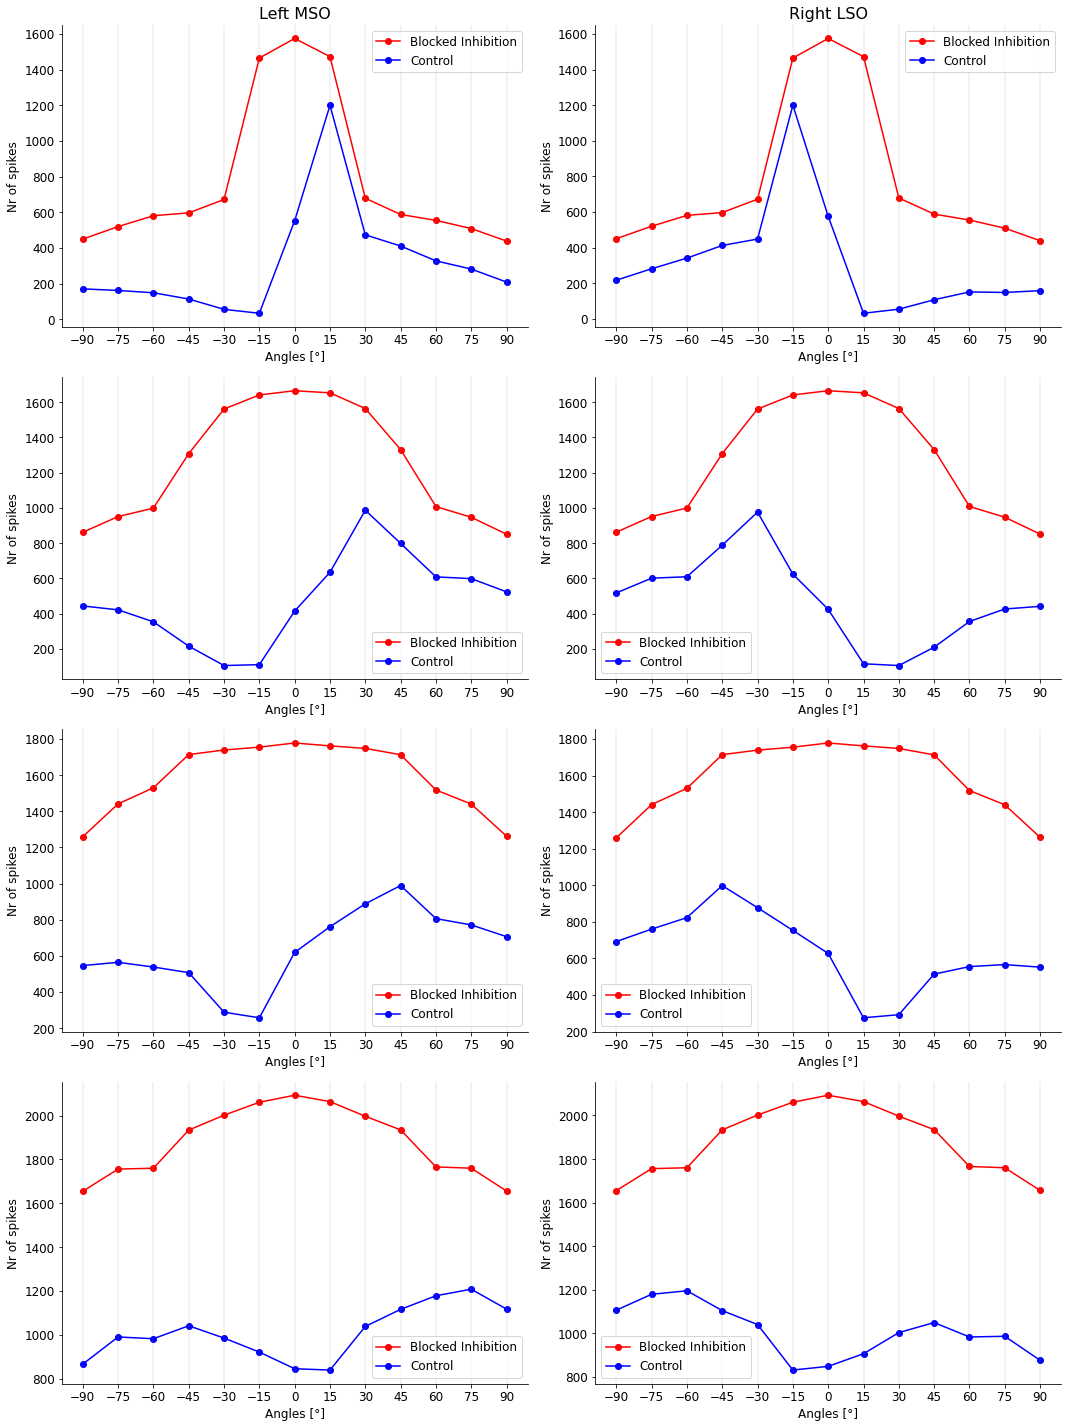

In [33]:
for tone in tones:

    fig, ax = plt.subplots(4, 2, figsize=(15,20))
    
    for peak in peaks:

        path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_peak_{}'.format(n_folder, tone, peak)
        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)


        ax[0,1].set_title("Right LSO")
        ax[0,0].set_title("Left MSO")
        #ax[0].set_ylabel("Absolute Spikes")

        ax[peaks.index(peak), 1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
        ax[peaks.index(peak), 1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
        ax[peaks.index(peak), 0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
        ax[peaks.index(peak), 0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

        for i in range(len(angles)):
            ax[peaks.index(peak), 1].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[peaks.index(peak), 0].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[peaks.index(peak), 1].set_xlabel("Angles [°]")
        ax[peaks.index(peak), 1].set_ylabel("Nr of spikes")
        ax[peaks.index(peak), 1].set_xticks(angles)
        ax[peaks.index(peak), 1].legend()
        ax[peaks.index(peak), 1].spines['top'].set_visible(False) 
        ax[peaks.index(peak), 1].spines['right'].set_visible(False)
        
        ax[peaks.index(peak), 0].set_xlabel("Angles [°]")
        ax[peaks.index(peak), 0].set_ylabel("Nr of spikes")
        ax[peaks.index(peak), 0].set_xticks(angles)
        ax[peaks.index(peak), 0].legend()
        ax[peaks.index(peak), 0].spines['top'].set_visible(False) 
        ax[peaks.index(peak), 0].spines['right'].set_visible(False)

        fig.tight_layout()
    plt.savefig('all')

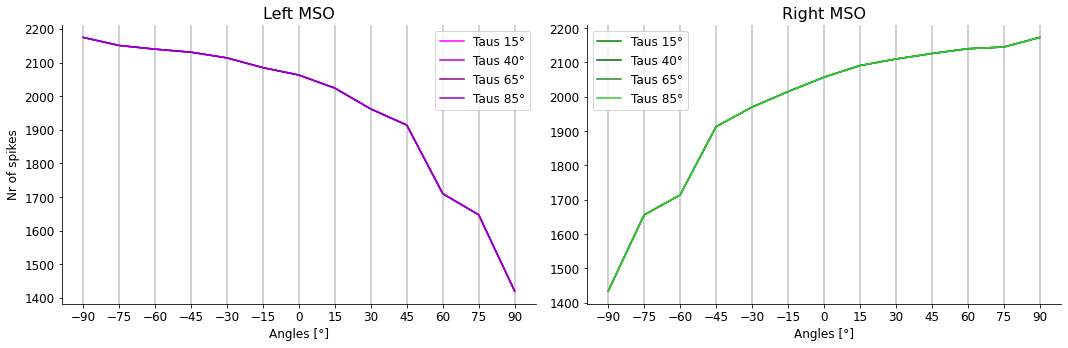

In [18]:
for tone in tones:

    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for peak in peaks:

        path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_peak_{}'.format(n_folder, tone, peak)
        path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_peak_{}'.format(n_folder, tone, peak)


        ax[1].set_title("Right MSO")
        ax[0].set_title("Left MSO")
        #ax[0].set_ylabel("Absolute Spikes")

        ax[1].plot(angles,np.loadtxt(path_r), colors2[peaks.index(peak)], label = "Taus {}°".format(peak))

        ax[0].plot(angles,np.loadtxt(path_l),colors1[peaks.index(peak)], label = "Taus {}°".format(peak))

        for i in range(len(angles)):
            ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
            ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

        ax[0].set_xlabel("Angles [°]")
        ax[0].set_ylabel("Nr of spikes")
        ax[0].set_xticks(angles)
        ax[0].legend()
        ax[0].spines['top'].set_visible(False) 
        ax[0].spines['right'].set_visible(False)

        ax[1].set_xlabel("Angles [°]")

        ax[1].set_xticks(angles)
        ax[1].legend()
        ax[1].spines['top'].set_visible(False) 
        ax[1].spines['right'].set_visible(False)
        fig.tight_layout()
    #plt.savefig('all')

# Old Results

In [19]:
n_folder = 20
tone = 1000
angles = np.arange(-90,100,15)
sdevs = [0.1]

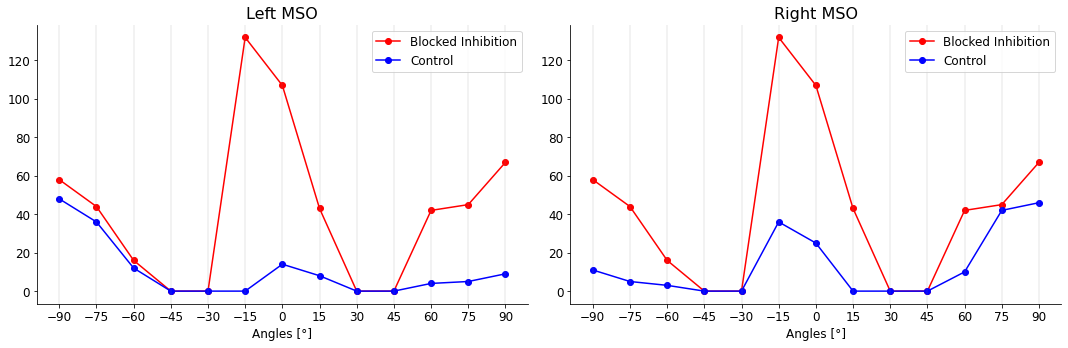

In [81]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

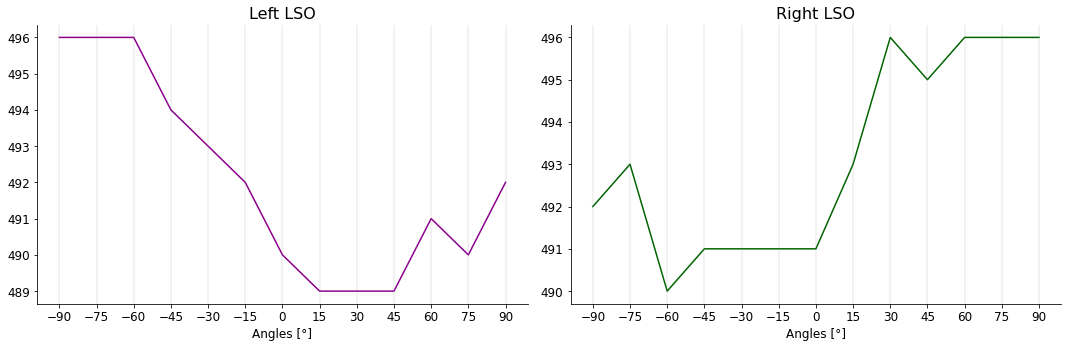

In [82]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r), "darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l),  "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

In [83]:
n_folder = 19
tone = 1000
angles = np.arange(-90,100,15)
sdevs = [0.1]

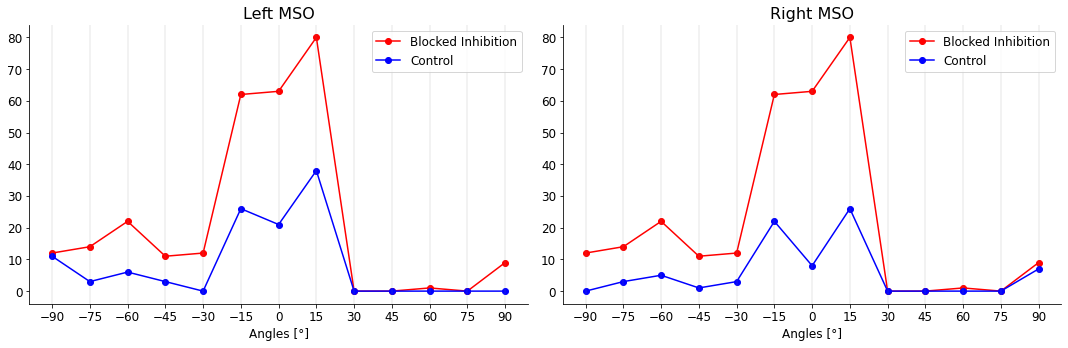

In [85]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

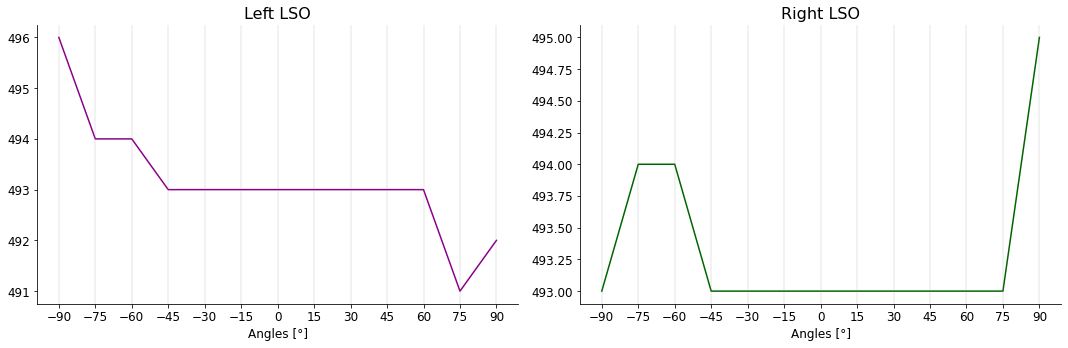

In [86]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r), "darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l),  "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 18

In [87]:
n_folder = 18
tone = 10000
angles = np.arange(-90,100,15)
sdevs = [0.1]

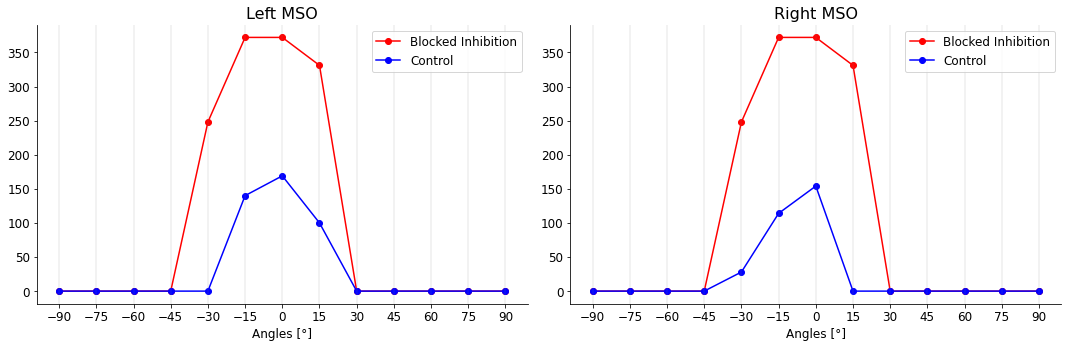

In [88]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

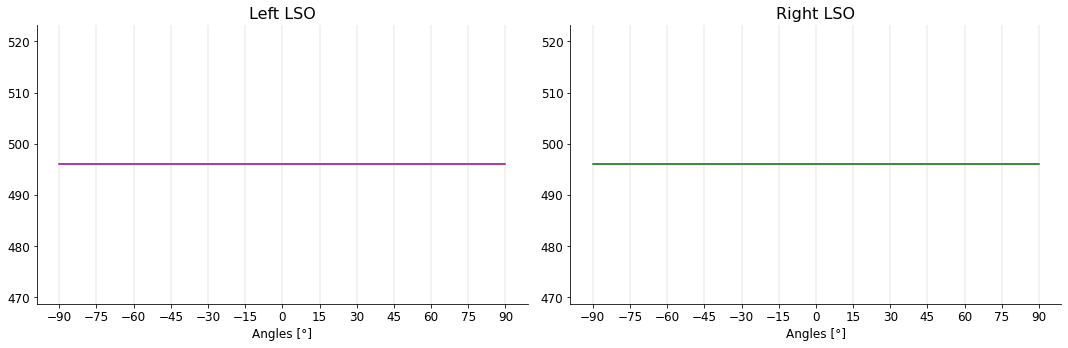

In [89]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r), "darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l),  "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 17

In [90]:
n_folder = 17
tone = 1000
angles = np.arange(-90,100,15)
sdevs = [0.1]

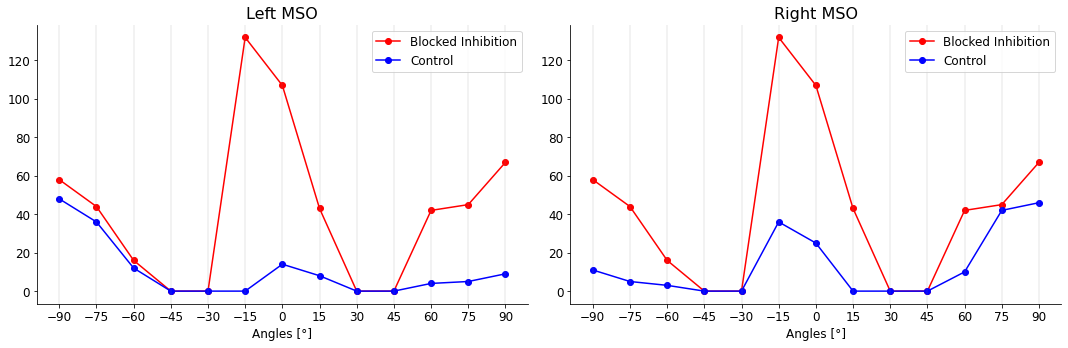

In [91]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

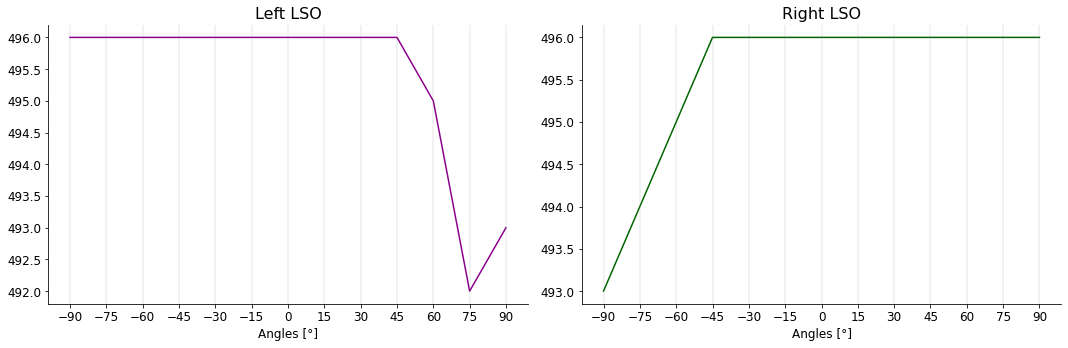

In [92]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 16

In [93]:
n_folder = 16
tones = [100,1000]
angles = np.arange(-90,100,15)
s = 0.1

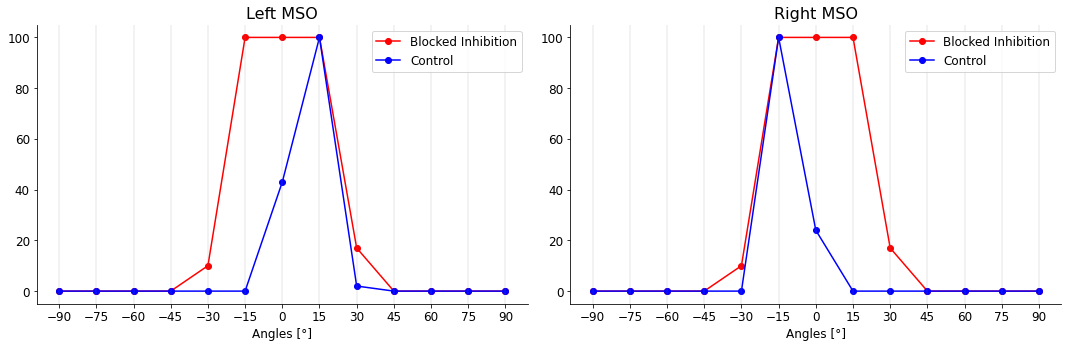

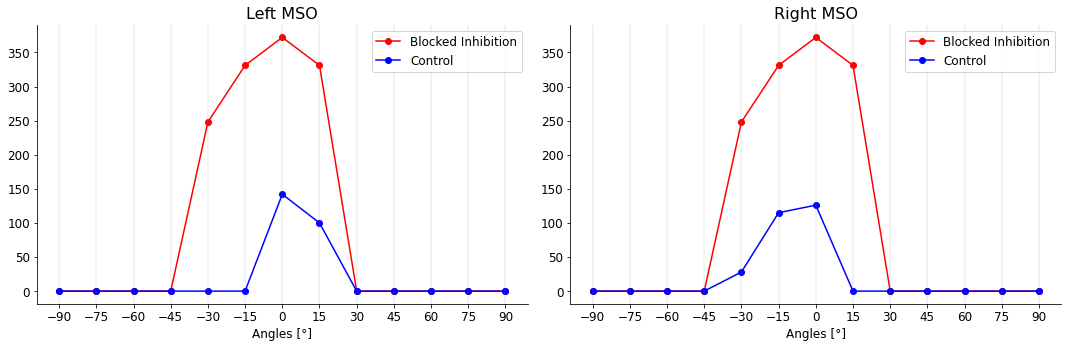

In [94]:
for tone in tones:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

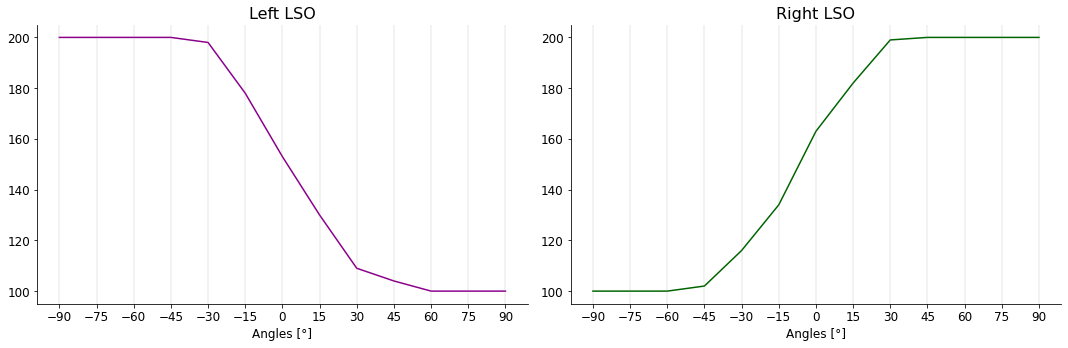

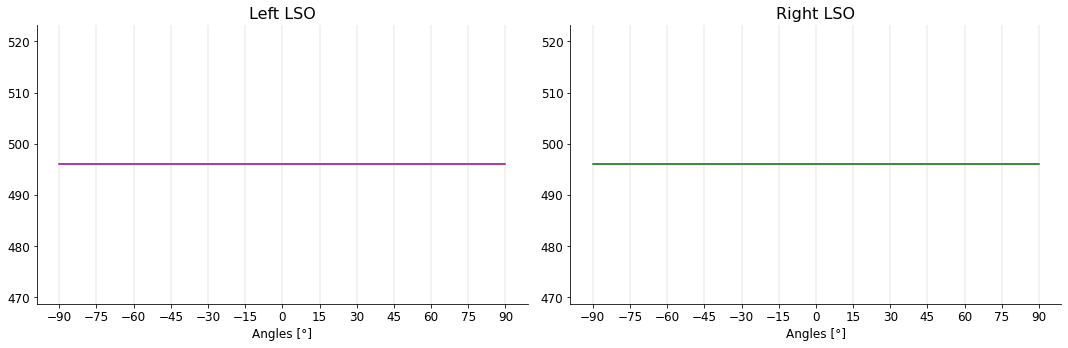

In [95]:
for tone in tones:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 15

In [96]:
n_folder = 15
tone = 1000
angles = np.arange(-90,100,15)
sdevs = [0, 0.1]

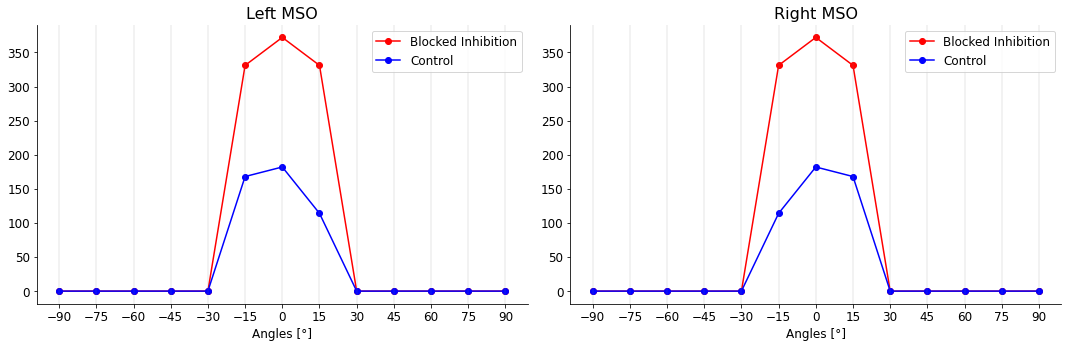

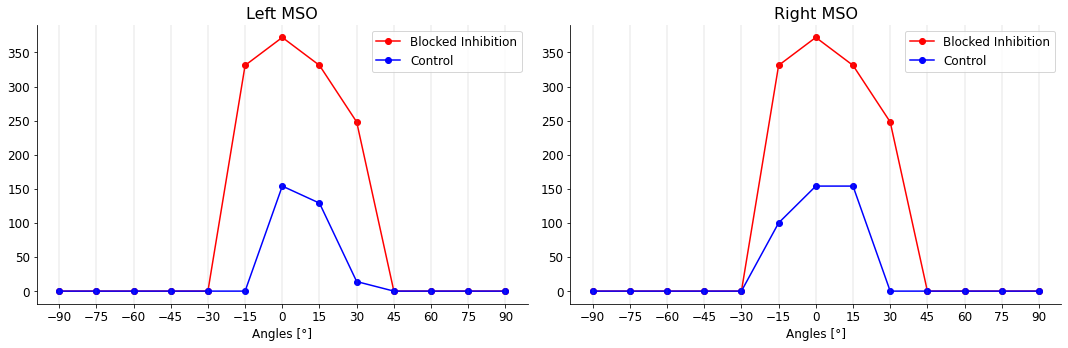

In [97]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

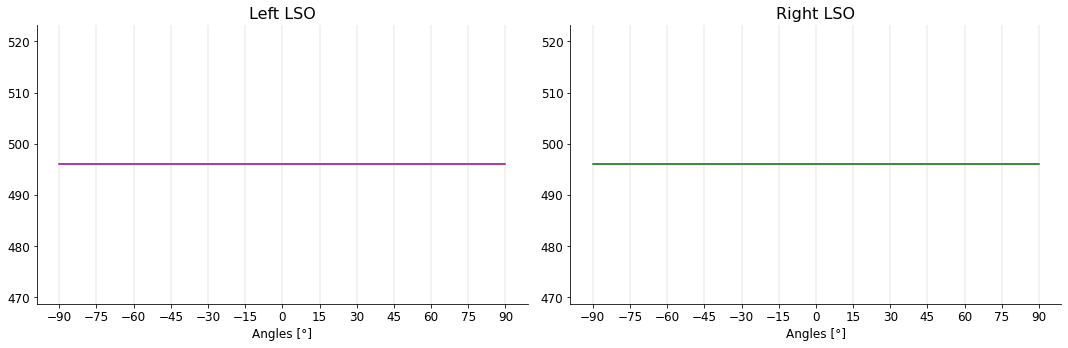

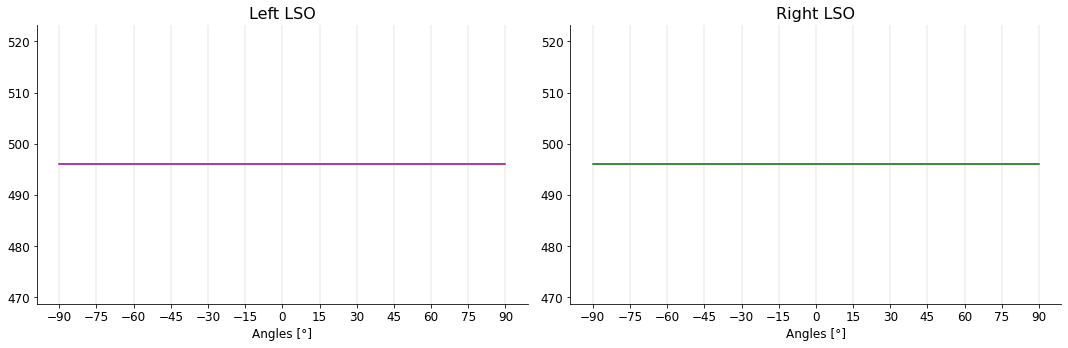

In [34]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 14

In [28]:
n_folder = 14
tone = 100
angles = np.arange(-90,100,15)
sdevs = [0]

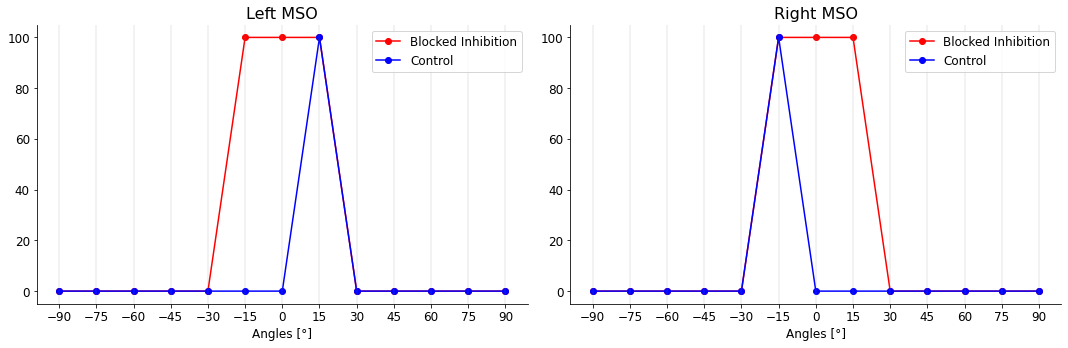

In [29]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

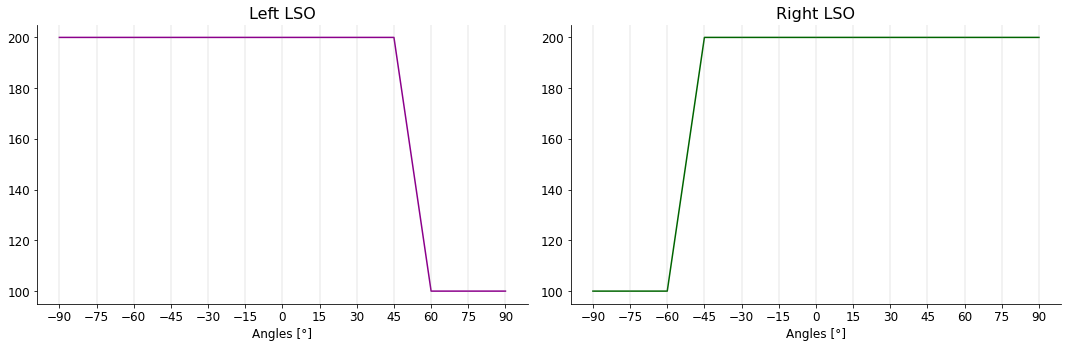

In [31]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 13

In [40]:
n_folder = 13
tone = 100
angles = np.arange(-90,100,15)
sdevs = [0]

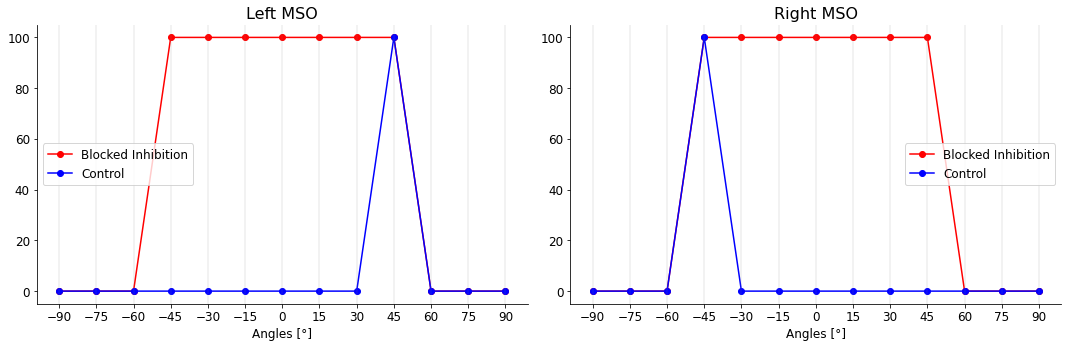

In [41]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

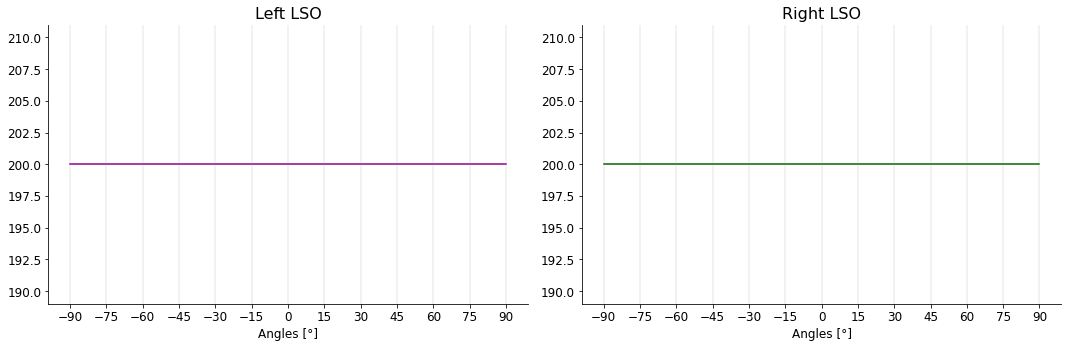

In [42]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

## Results 12

In [46]:
n_folder = 12
tone = 100
angles = np.arange(-90,100,15)
sdevs = [0]

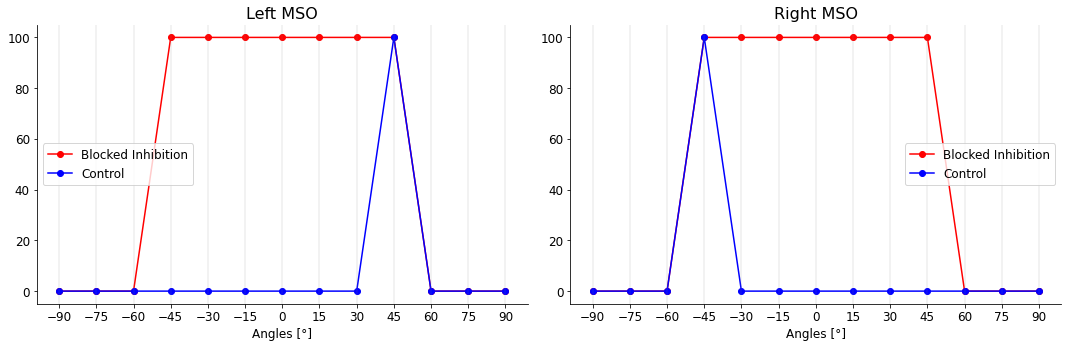

In [47]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

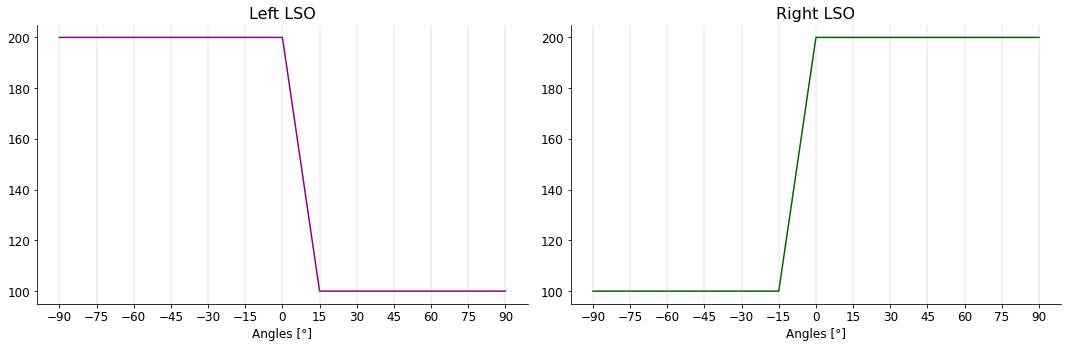

In [48]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

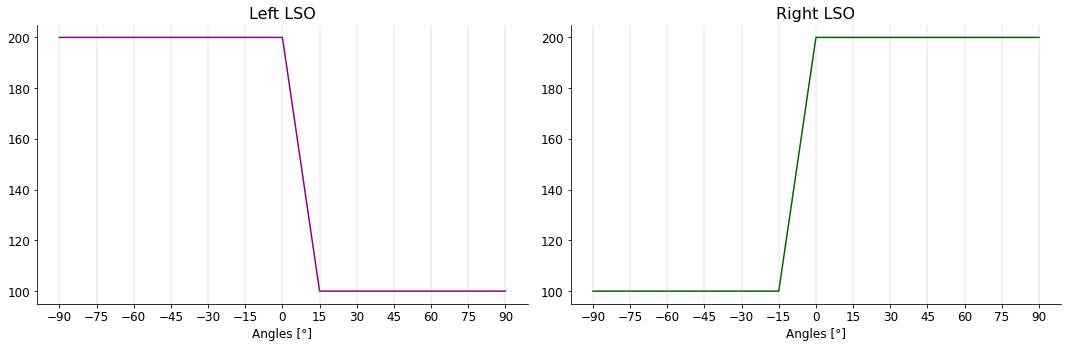

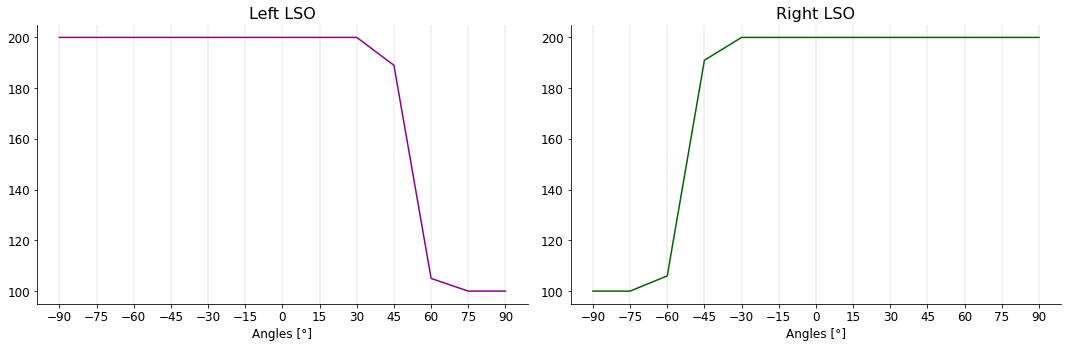

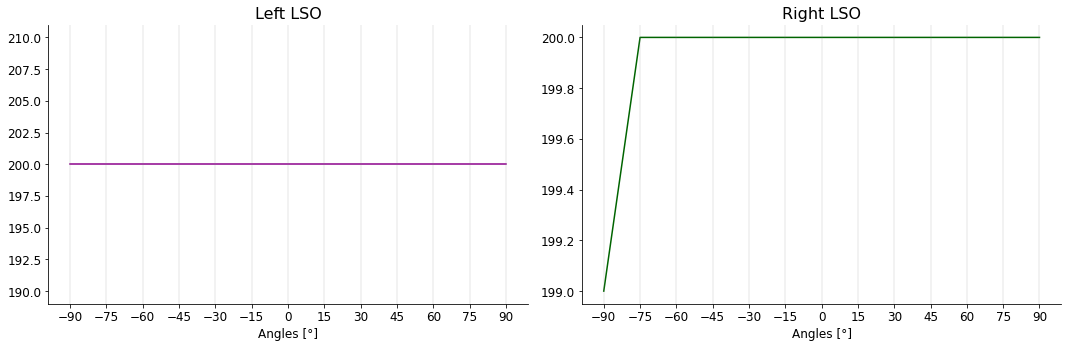

In [7]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right LSO")
    ax[0].set_title("Left LSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r),"darkgreen")
    ax[0].plot(angles,np.loadtxt(path_l), "darkmagenta")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

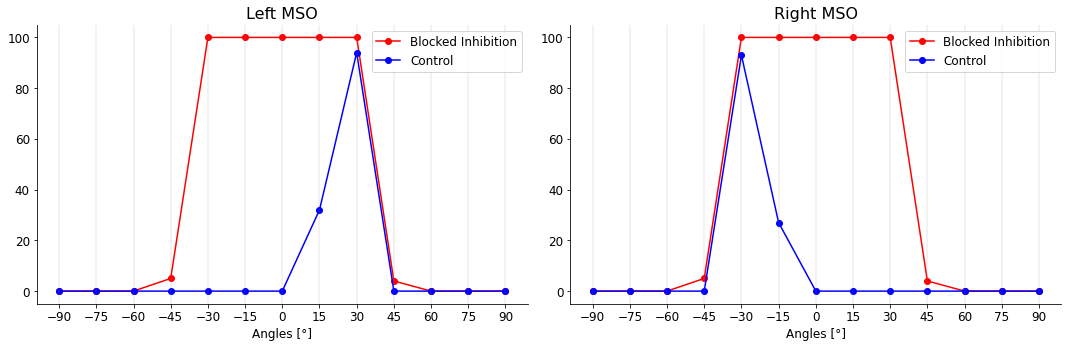

In [49]:
n_folder = 11
s=0.1
fig, ax = plt.subplots(1, 2, figsize=(15,5))
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

ax[1].set_title("Right MSO")
ax[0].set_title("Left MSO")
#ax[0].set_ylabel("Absolute Spikes")

ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
ax[0].legend()
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
ax[1].legend()
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
#plt.savefig('all')

In [9]:
n_folder = 10
tone = 100
angles = np.arange(-90,100,15)
sdevs = [0,0.1,0.2]

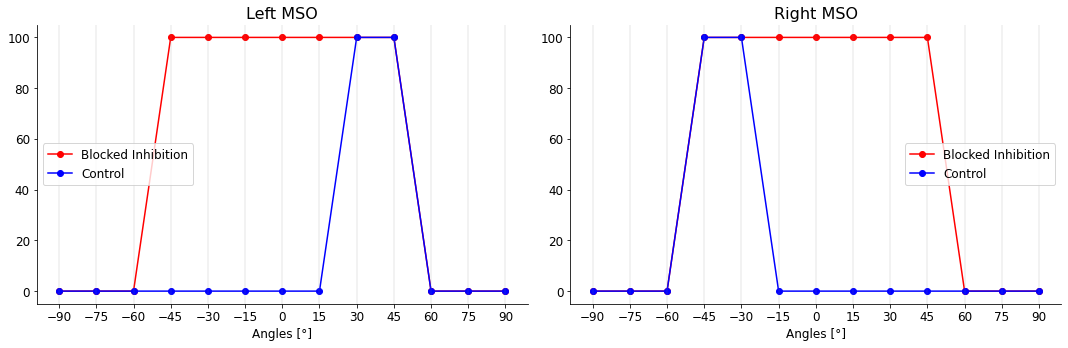

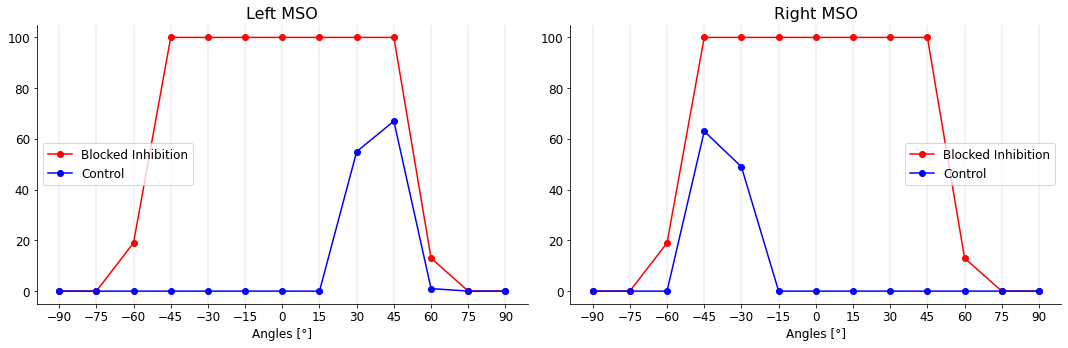

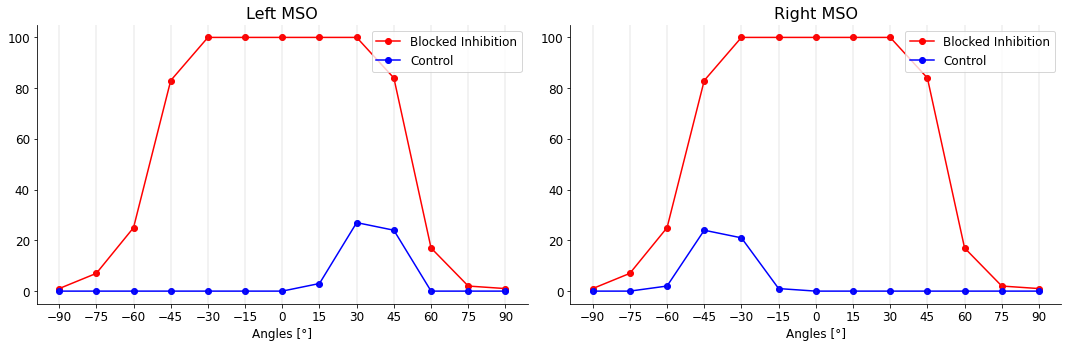

In [10]:
for s in sdevs:
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}_sdev_{}'.format(n_folder, tone, s)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}_sdev_{}'.format(n_folder, tone, s)

    ax[1].set_title("Right MSO")
    ax[0].set_title("Left MSO")
    #ax[0].set_ylabel("Absolute Spikes")

    ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
    ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
    ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
    ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

    for i in range(len(angles)):
        ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[0].set_xlabel("Angles [°]")
    ax[0].set_xticks(angles)
    ax[0].legend()
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)

    ax[1].set_xlabel("Angles [°]")
    ax[1].set_xticks(angles)
    ax[1].legend()
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    fig.tight_layout()
    #plt.savefig('all')

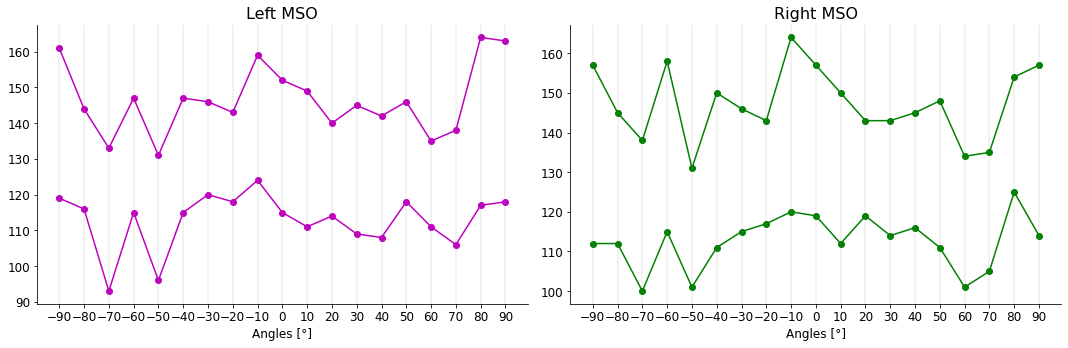

In [4]:
n_folder = 5
angles = np.arange(-90,100,10)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}'.format(n_folder, tone)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(n_folder, tone)

ax[1].set_title("Right MSO")
ax[0].set_title("Left MSO")
#ax[0].set_ylabel("Absolute Spikes")

ax[1].plot(angles,np.loadtxt(path_r)[0],"go-")
ax[1].plot(angles,np.loadtxt(path_r)[1],"go-")
ax[0].plot(angles,np.loadtxt(path_l)[0],"mo-")
ax[0].plot(angles,np.loadtxt(path_l)[1],"mo-")

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
#plt.savefig('all')

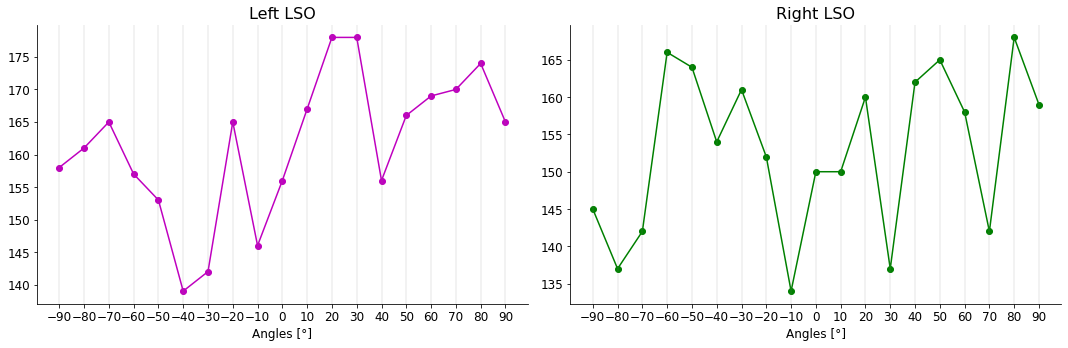

In [60]:
n_folder = 1
angles = np.arange(-90,100,10)
fig, ax = plt.subplots(1, 2, figsize=(15,5))
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_r_freq_{}'.format(n_folder, tone)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/LSO_l_freq_{}'.format(n_folder, tone)

ax[1].set_title("Right LSO")
ax[0].set_title("Left LSO")
#ax[0].set_ylabel("Absolute Spikes")

ax[1].plot(angles,np.loadtxt(path_r),"go-")
ax[0].plot(angles,np.loadtxt(path_l),"mo-")

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
#plt.savefig('all')

# Bushy cells timing (network_poiss_sin_gen)

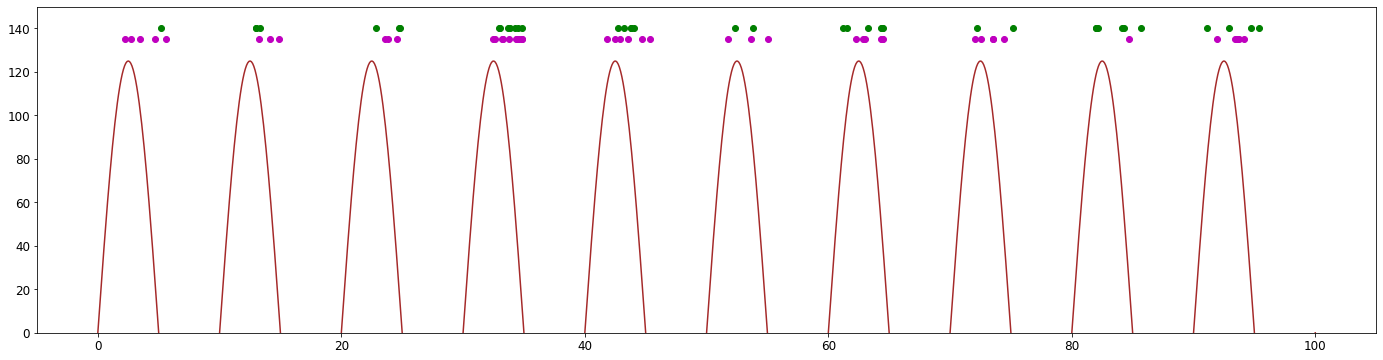

In [52]:
fig, ax = plt.subplots(figsize = (24,6))
lim = 100
ax.set_ylim(0,150)
#ax.set_xlim(32.2,32.8)
t = np.linspace(0,lim,1000)


a = 0
nucleus = 'ANF'
ax.plot(t, 125*np.sin(2*np.pi*100*t),  color = 'brown')
ax.scatter(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_r_{}'.format(a,nucleus)), 140*np.ones_like(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_r_{}'.format(a,nucleus))), color = 'g')
ax.scatter(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_l_{}'.format(a,nucleus)), 135*np.ones_like(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_l_{}'.format(a,nucleus))), color = 'm')

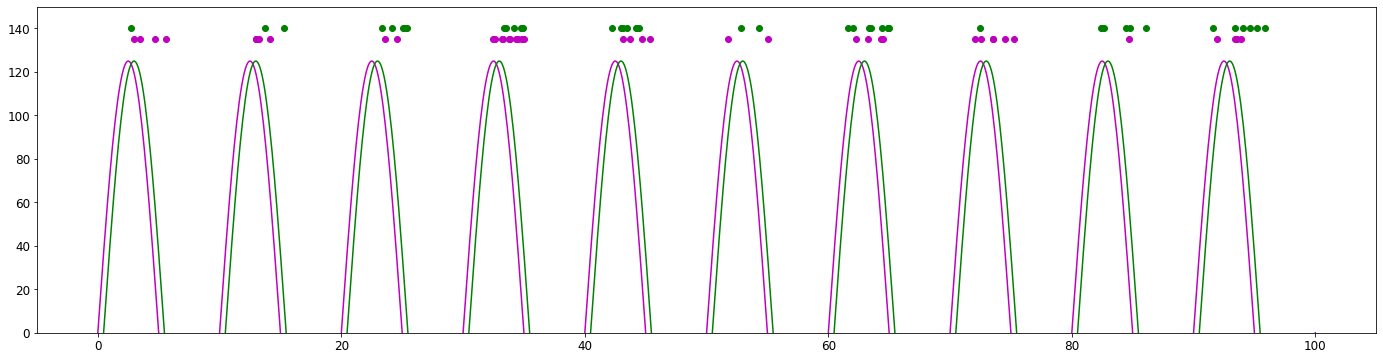

In [45]:
fig, ax = plt.subplots(figsize = (24,6))
lim = 100
ax.set_ylim(0,150)
#ax.set_xlim(32.2,32.8)
t = np.linspace(0,lim,1000)


a = -45
w_head = 22 #cm
v_sound = 33000 #cm/s
delta_xx = (w_head*np.sin(np.deg2rad(a)))
itdx = 1000*delta_xx/v_sound #ms
ipdx = 2*np.pi*itdx*100/1000
ax.plot(t, 125*np.sin(2*np.pi*100*t),  color = 'm')
ax.plot(t, 125*np.sin(2*np.pi*100*t + ipdx),  color = 'g')
ax.scatter(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_r_{}'.format(a,nucleus)), 140*np.ones_like(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_r_{}'.format(a,nucleus))), color = 'g')
ax.scatter(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_l_{}'.format(a,nucleus)), 135*np.ones_like(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_l_{}'.format(a,nucleus))), color = 'm')

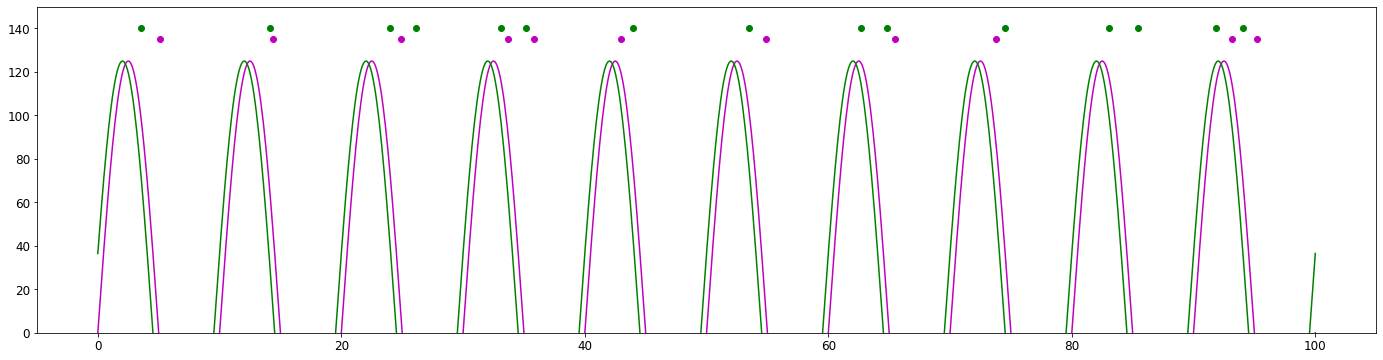

In [51]:
fig, ax = plt.subplots(figsize = (24,6))
lim = 100
ax.set_ylim(0,150)
#ax.set_xlim(32.2,32.8)
t = np.linspace(0,lim,1000)

nucleus = 'GBCh'
a = 45
w_head = 22 #cm
v_sound = 33000 #cm/s
delta_xx = (w_head*np.sin(np.deg2rad(a)))
itdx = 1000*delta_xx/v_sound #ms
ipdx = 2*np.pi*itdx*100/1000
ax.plot(t, 125*np.sin(2*np.pi*100*t),  color = 'm')
ax.plot(t, 125*np.sin(2*np.pi*100*t + ipdx),  color = 'g')
ax.scatter(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_r_{}'.format(a,nucleus)), 140*np.ones_like(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_r_{}'.format(a,nucleus))), color = 'g')
ax.scatter(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_l_{}'.format(a,nucleus)), 135*np.ones_like(np.loadtxt('/home/ubuntu/cosyne-tutorial-2022/bc_test/{}_l_{}'.format(a,nucleus))), color = 'm')

# Results 6 (lost): sin poisson for 10s stim

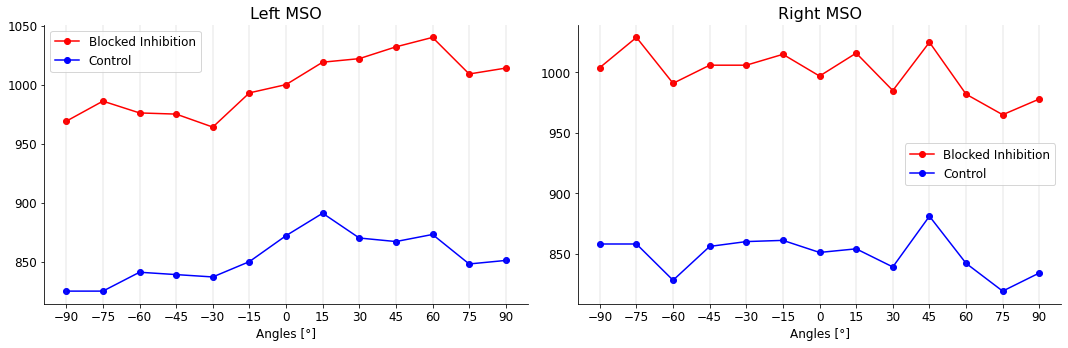

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}'.format(n_folder, tone)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(n_folder, tone)

ax[1].set_title("Right MSO")
ax[0].set_title("Left MSO")
#ax[0].set_ylabel("Absolute Spikes")

ax[1].plot(angles,np.loadtxt(path_r)[0],"ro-", label = "Blocked Inhibition")
ax[1].plot(angles,np.loadtxt(path_r)[1],"bo-", label = "Control")
ax[0].plot(angles,np.loadtxt(path_l)[0],"ro-", label = "Blocked Inhibition")
ax[0].plot(angles,np.loadtxt(path_l)[1],"bo-", label = "Control")

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
ax[0].legend()
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
ax[1].legend()
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
#plt.savefig('all')

# Old plots

In [38]:
tone = 100
nuclei = ['SBC', 'GBC', 'LSO']
angles = np.arange(-90, 100, 10)

In [46]:
n_folder = 1

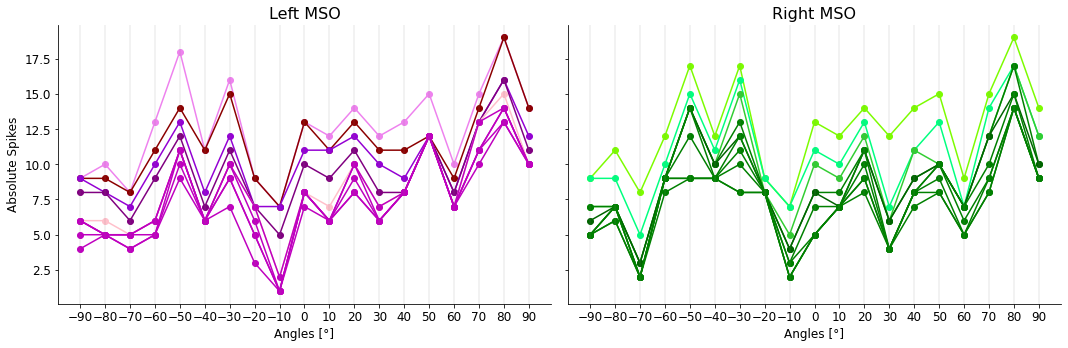

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharey = True)
MNTBCs2MSO_weights = [0, -2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0]

colorsr = ['lawngreen', 'springgreen', 'limegreen', 'green', 'darkgreen','g', 'g', 'g', 'g', 'g']
colorsl = ['violet', 'darkred', 'darkviolet', 'purple', 'pink', 'm', 'm', 'm', 'm', 'm']
        
path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_r_freq_{}'.format(n_folder, tone)
path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(n_folder, tone)

ax[1].set_title("Right MSO")
ax[0].set_title("Left MSO")
ax[0].set_ylabel("Absolute Spikes")

for w in range(len(MNTBCs2MSO_weights)):
    ax[1].plot(angles,np.loadtxt(path_r)[w,:],"o-", color = colorsr[w], label = "Right MSO w = {} nS".format(MNTBCs2MSO_weights[w]))
    ax[0].plot(angles,np.loadtxt(path_l)[w,:],"o-", label = "Left MSO w = {} nS".format(MNTBCs2MSO_weights[w]), color = colorsl[w])

for i in range(len(angles)):
    ax[0].axvline(angles[i], linewidth = 0.2, color = 'grey')
    ax[1].axvline(angles[i], linewidth = 0.2, color = 'grey')

ax[0].set_xlabel("Angles [°]")
ax[0].set_xticks(angles)
#ax.legend()
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].set_xlabel("Angles [°]")
ax[1].set_xticks(angles)
#ax.legend()
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)
fig.tight_layout()
plt.savefig('all')

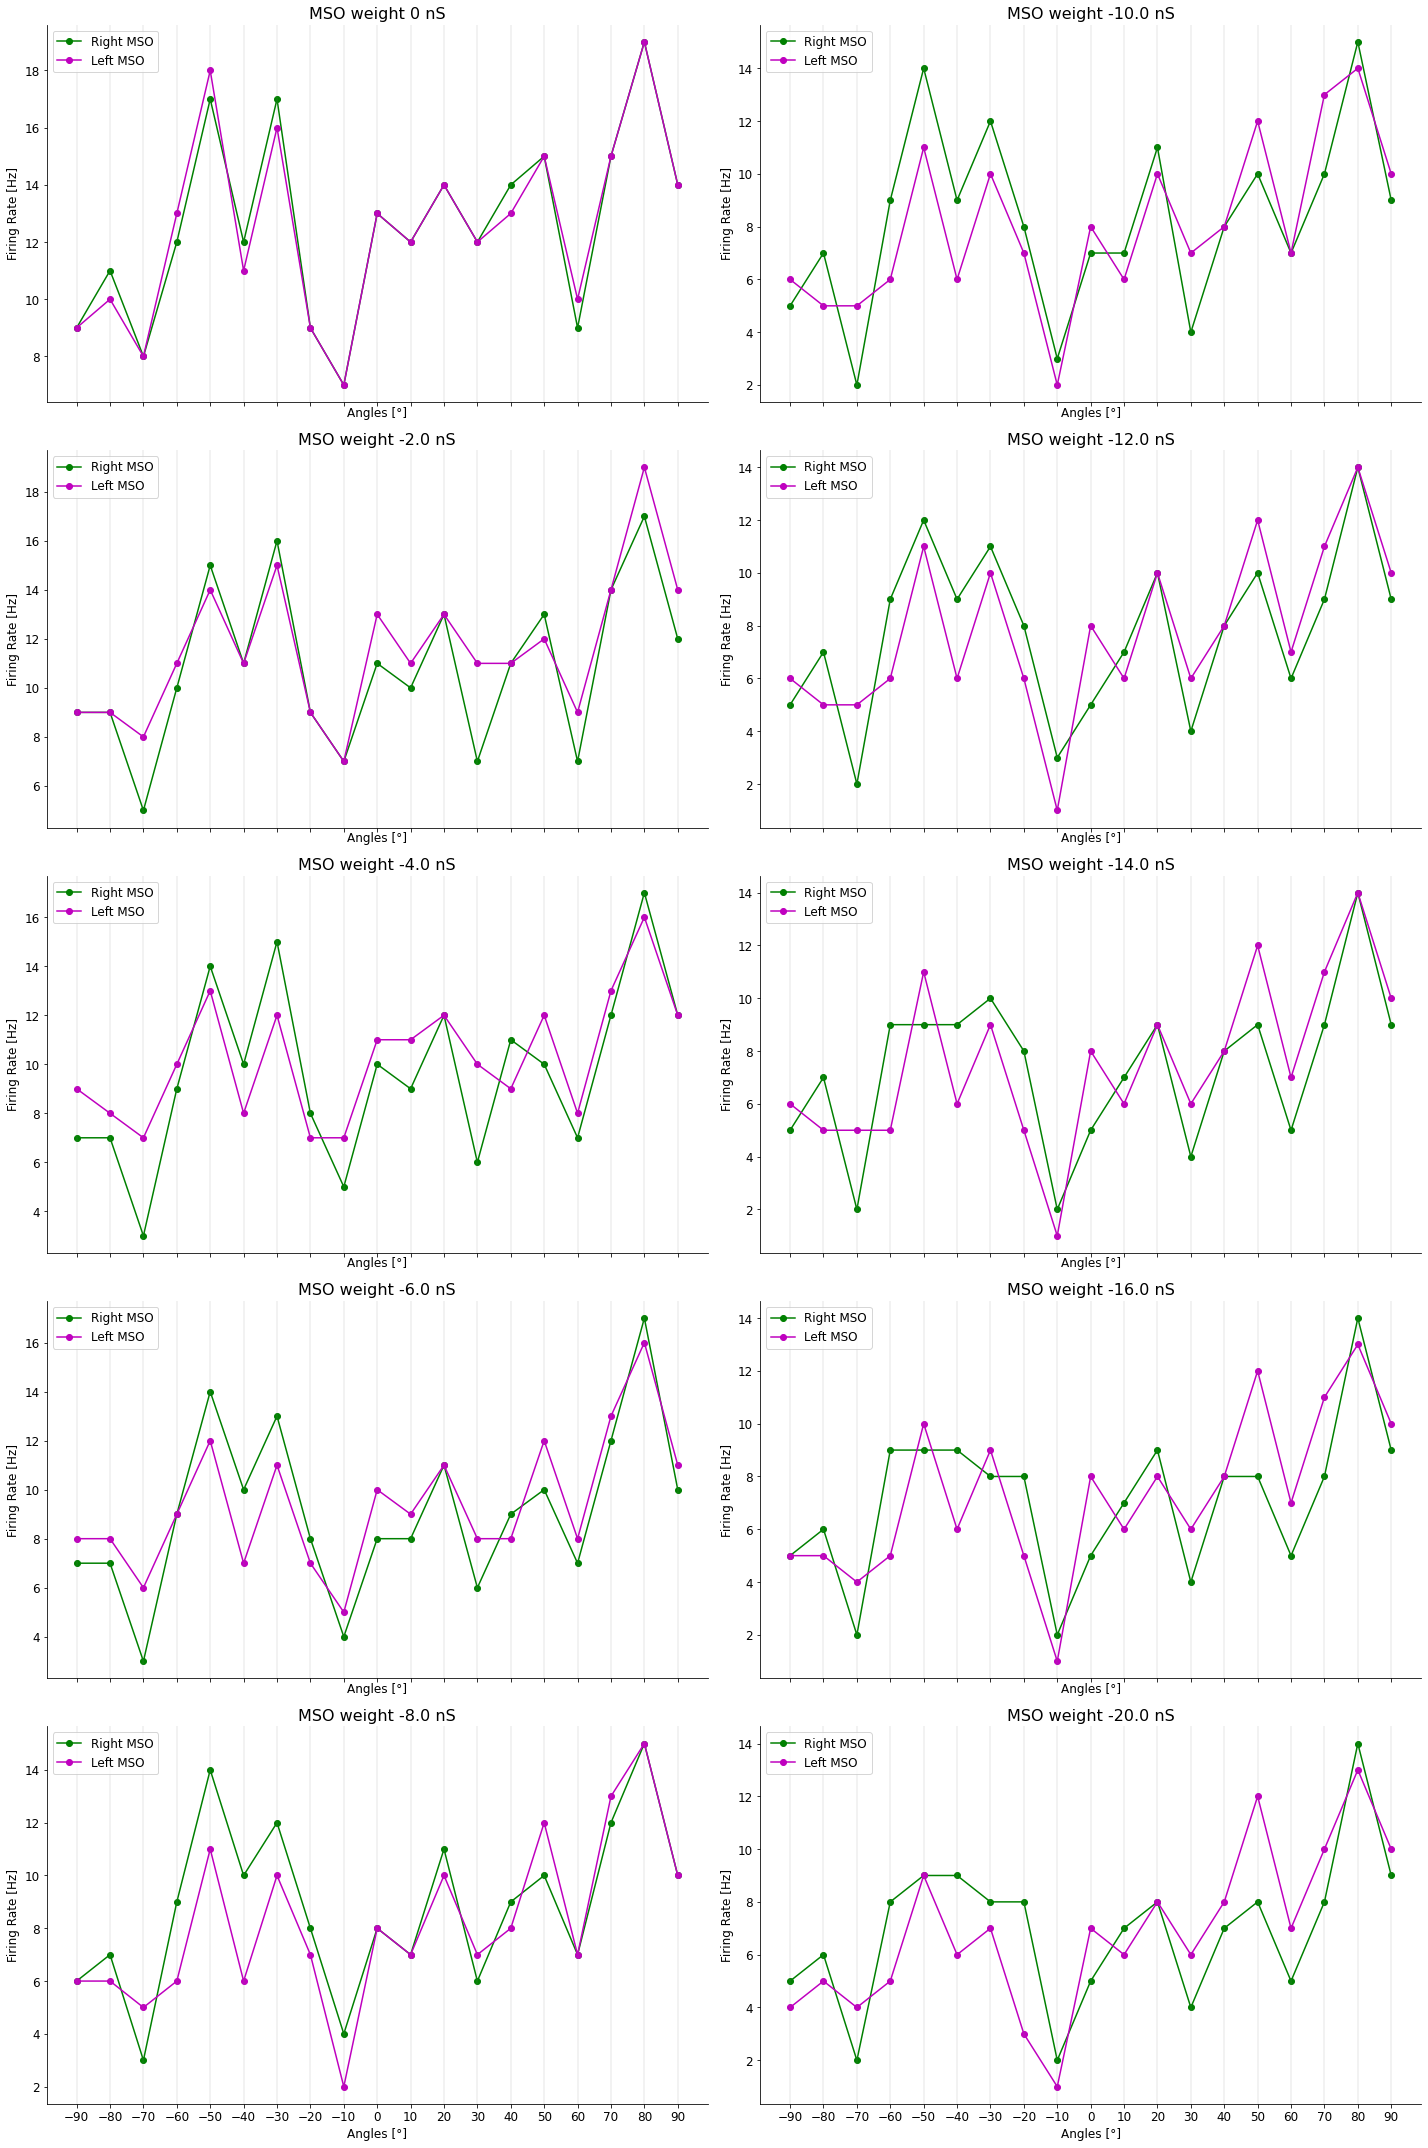

In [48]:
fig, ax = plt.subplots(5, 2, figsize=(20,30), sharex=True)

for w in range(5):
    ax[w,0].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
    ax[w,0].set_ylabel("Firing Rate [Hz]")
    
    ax[w,0].plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
    ax[w,0].plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

    for i in range(len(angles)):
        ax[w,0].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,0].set_xlabel("Angles [°]")
    ax[w,0].set_xticks(angles)
    ax[w,0].legend()
    ax[w,0].spines['top'].set_visible(False)
    ax[w,0].spines['right'].set_visible(False)

    ax[w,1].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w+5]))
    ax[w,1].set_ylabel("Firing Rate [Hz]")
    
    ax[w,1].plot(angles,np.loadtxt(path_r)[w+5,:],"o-g",label = "Right MSO")
    ax[w,1].plot(angles,np.loadtxt(path_l)[w+5,:],"o-m", label = "Left MSO")

    for i in range(len(angles)):
        ax[w,1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,1].set_xlabel("Angles [°]")
    ax[w,1].set_xticks(angles)
    ax[w,1].legend()
    ax[w,1].spines['top'].set_visible(False)
    ax[w,1].spines['right'].set_visible(False)
    
fig.tight_layout()
plt.savefig('each')

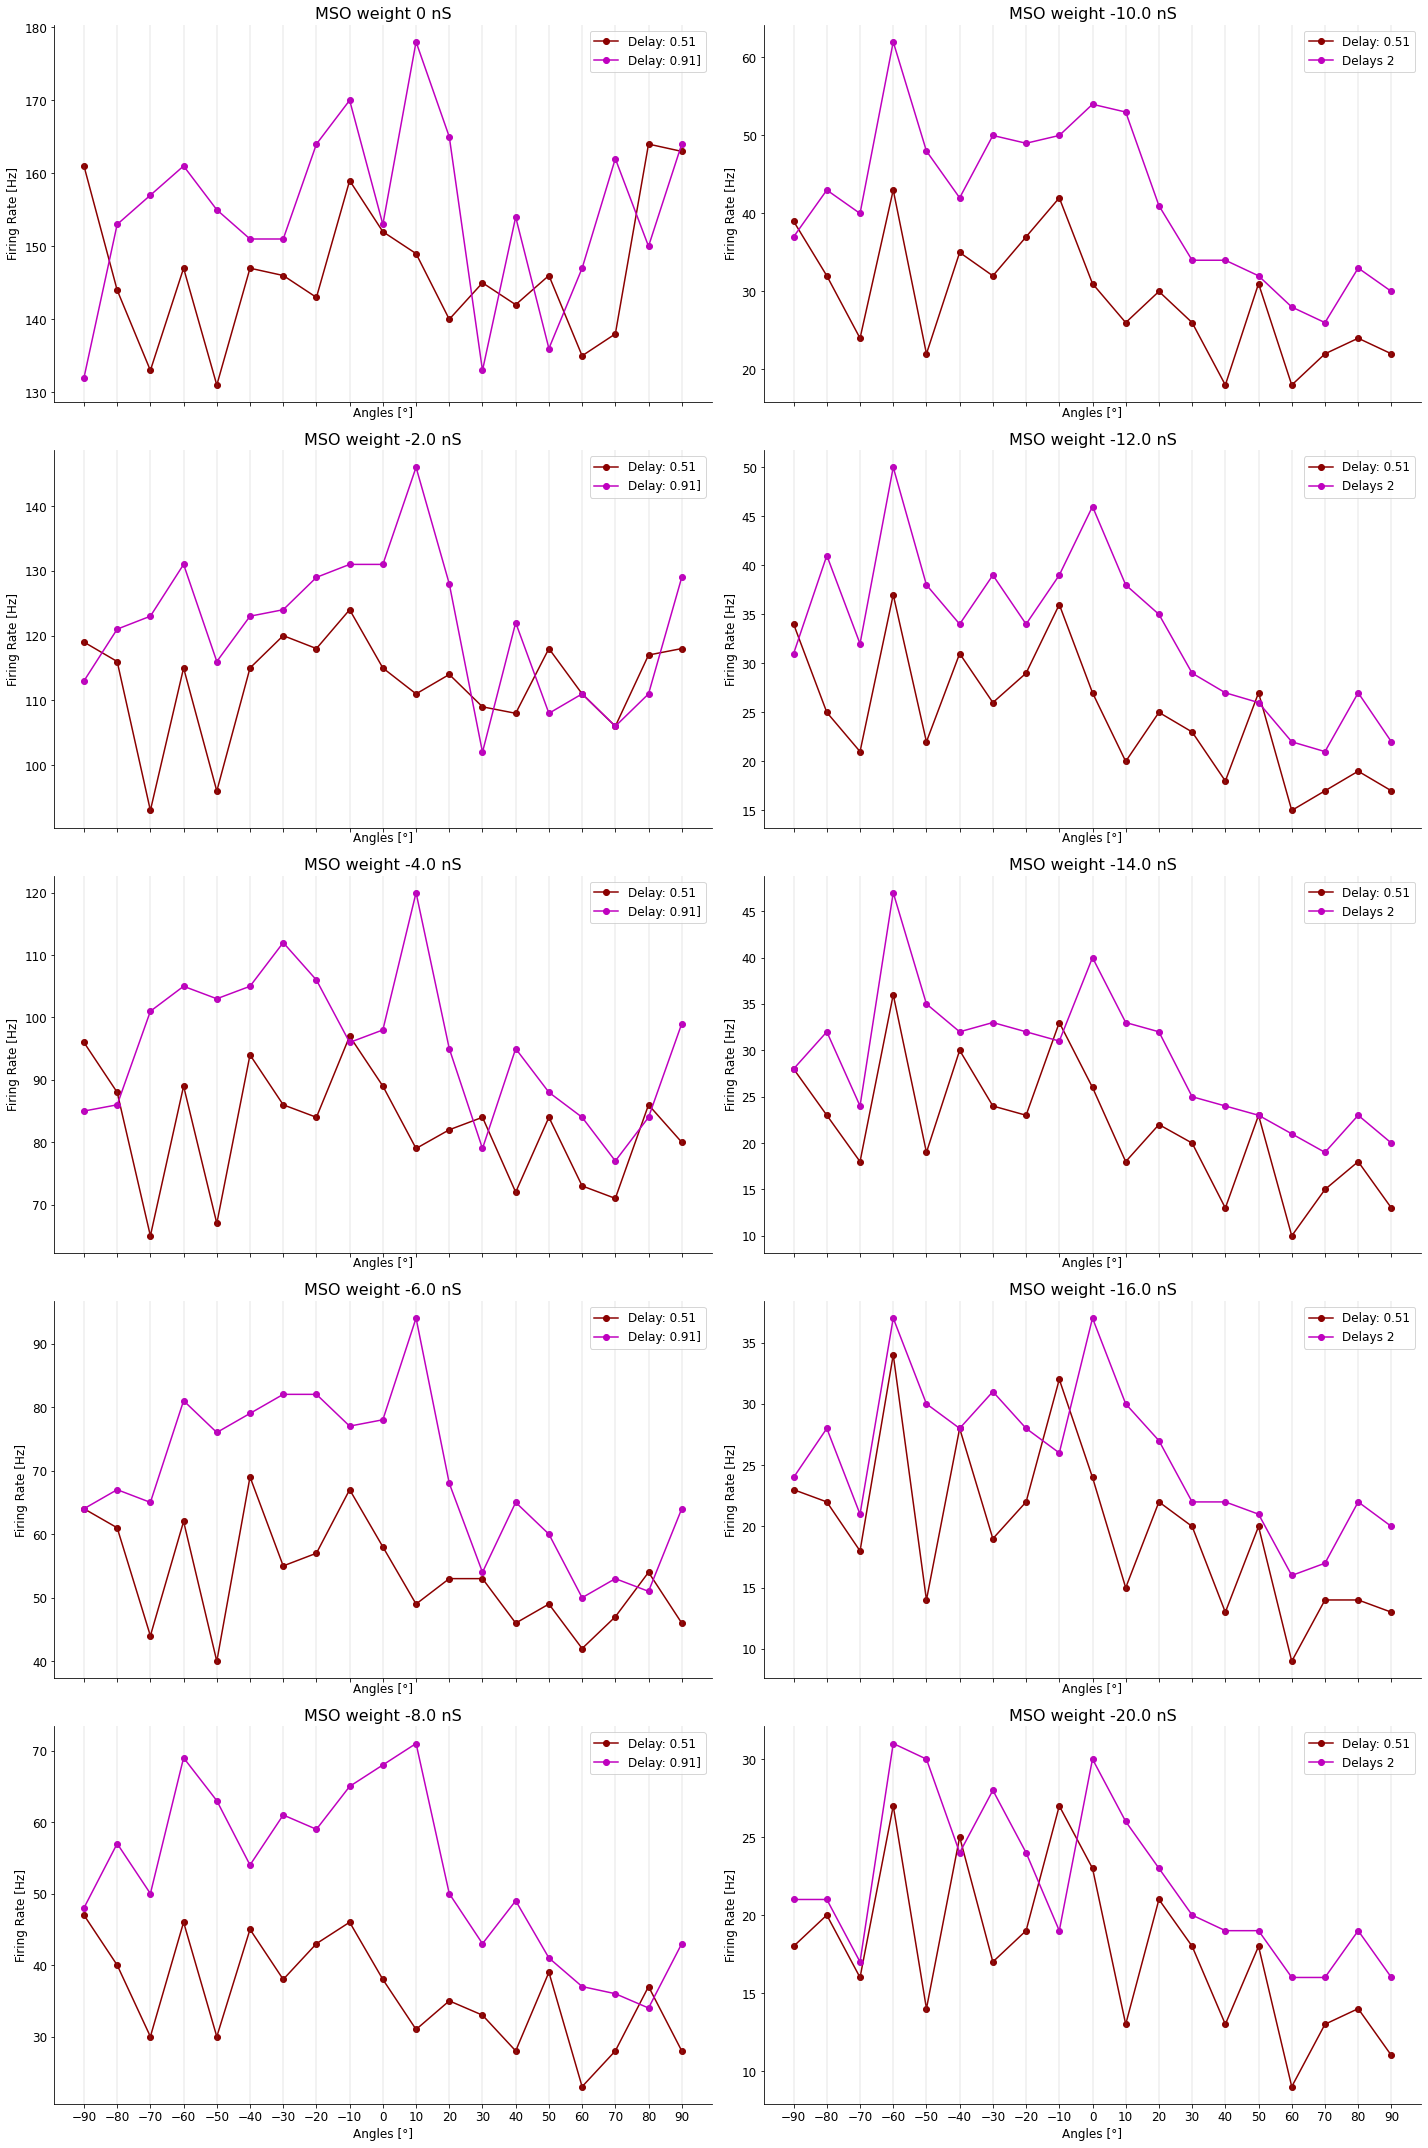

In [45]:
fig, ax = plt.subplots(5, 2, figsize=(20,30), sharex=True)

path_1 = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(5, tone)
path_2 = '/home/ubuntu/cosyne-tutorial-2022/results{}/MSO_l_freq_{}'.format(3, tone)

for w in range(5):
    ax[w,0].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
    ax[w,0].set_ylabel("Firing Rate [Hz]")
    
    ax[w,0].plot(angles,np.loadtxt(path_1)[w,:],"o-", color = 'darkred', label = "Delay: 0.51")
    ax[w,0].plot(angles,np.loadtxt(path_2)[w,:],"o-m", label = "Delay: 0.91]")

    for i in range(len(angles)):
        ax[w,0].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,0].set_xlabel("Angles [°]")
    ax[w,0].set_xticks(angles)
    ax[w,0].legend()
    ax[w,0].spines['top'].set_visible(False)
    ax[w,0].spines['right'].set_visible(False)

    ax[w,1].set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w+5]))
    ax[w,1].set_ylabel("Firing Rate [Hz]")
    
    ax[w,1].plot(angles,np.loadtxt(path_1)[w+5,:],"o-", color = 'darkred', label = "Delay: 0.51")
    ax[w,1].plot(angles,np.loadtxt(path_2)[w+5,:],"o-m", label = "Delays 2")

    for i in range(len(angles)):
        ax[w,1].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[w,1].set_xlabel("Angles [°]")
    ax[w,1].set_xticks(angles)
    ax[w,1].legend()
    ax[w,1].spines['top'].set_visible(False)
    ax[w,1].spines['right'].set_visible(False)
    
fig.tight_layout()
plt.savefig('each')

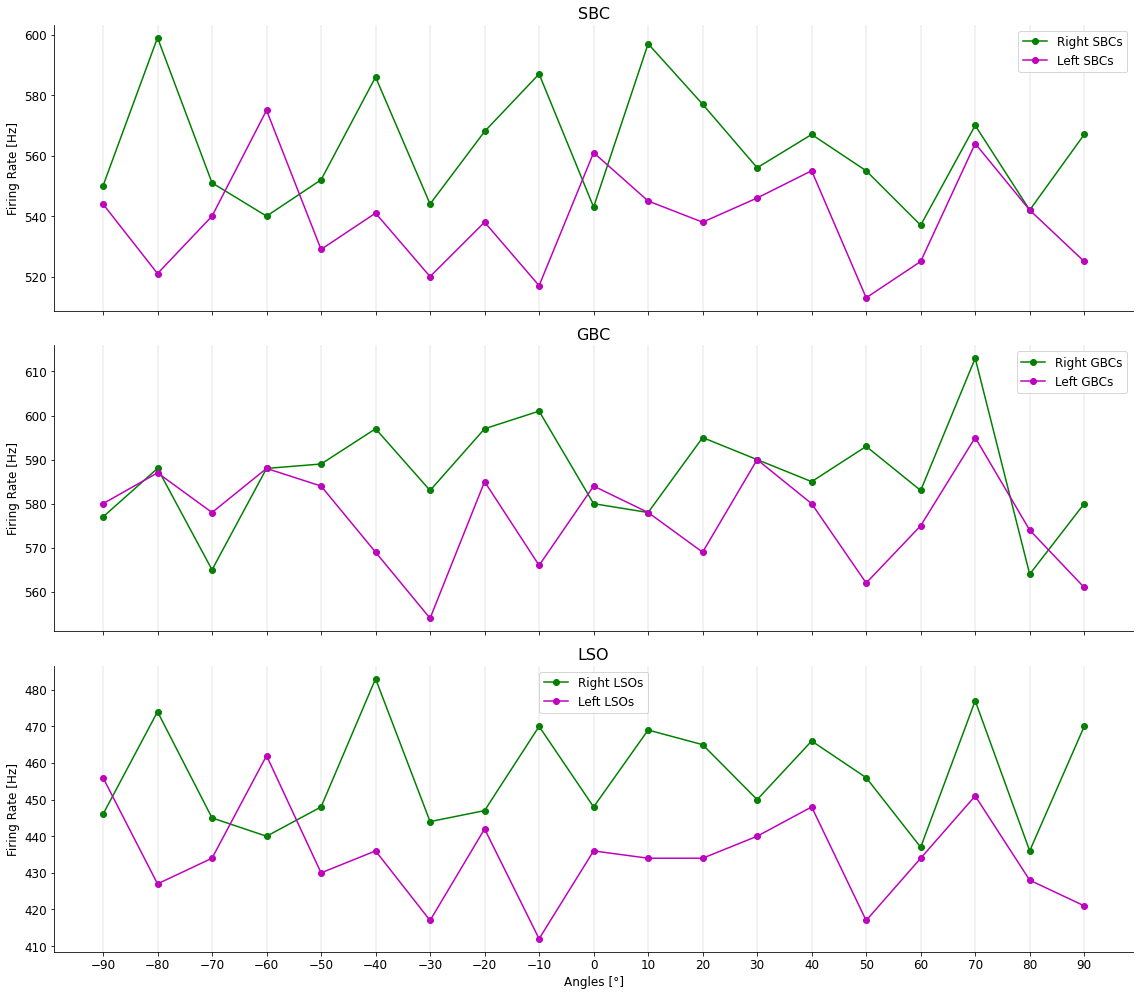

In [15]:
fig, ax = plt.subplots(len(nuclei), 1, figsize=(16,14), sharex=True)


for n in nuclei:
        
    path_r = '/home/ubuntu/cosyne-tutorial-2022/results{}/{}_r_freq_{}'.format(n_folder, n, tone)
    path_l = '/home/ubuntu/cosyne-tutorial-2022/results{}/{}_l_freq_{}'.format(n_folder, n, tone)
    
    ax[nuclei.index(n)].set_title("{}".format(n))
    ax[nuclei.index(n)].set_ylabel("Firing Rate [Hz]")
    
    ax[nuclei.index(n)].plot(angles,np.loadtxt(path_r),"o-g", label = 'Right {}s'.format(n))
    ax[nuclei.index(n)].plot(angles,np.loadtxt(path_l),"o-m", label = 'Left {}s'.format(n))
    ax[nuclei.index(n)].legend()

    for i in range(len(angles)):
        ax[nuclei.index(n)].axvline(angles[i], linewidth = 0.2, color = 'grey')

    ax[nuclei.index(n)].spines['top'].set_visible(False)
    ax[nuclei.index(n)].spines['right'].set_visible(False)
    
ax[-1].set_xlabel("Angles [°]")
ax[-1].set_xticks(angles)
fig.tight_layout()

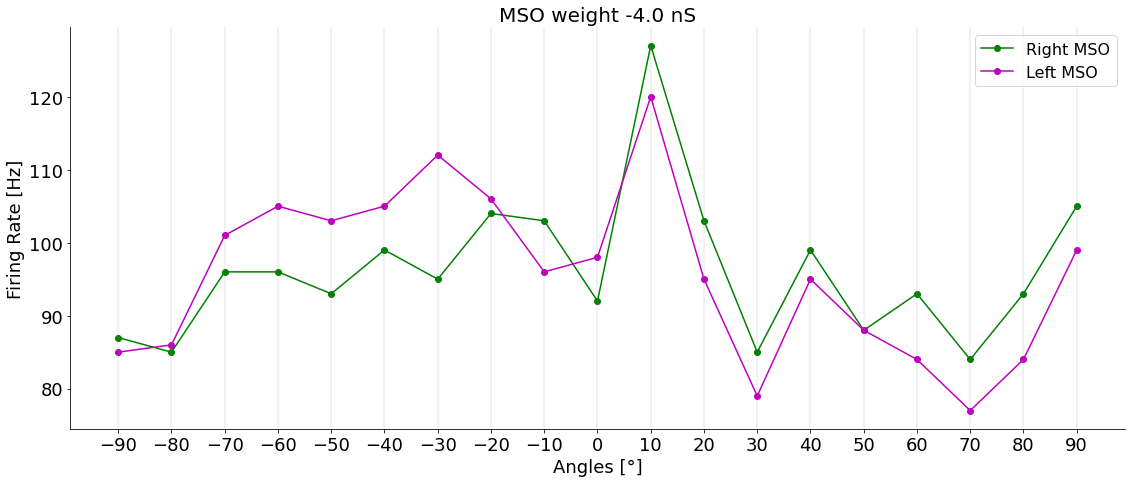

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(16,7), sharex=True)
w = 2

ax.set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
ax.set_ylabel("Firing Rate [Hz]")


ax.plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
ax.plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

for i in range(len(angles)):
    ax.axvline(angles[i], linewidth = 0.2, color = 'grey')

ax.set_xlabel("Angles [°]")
ax.set_xticks(angles)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

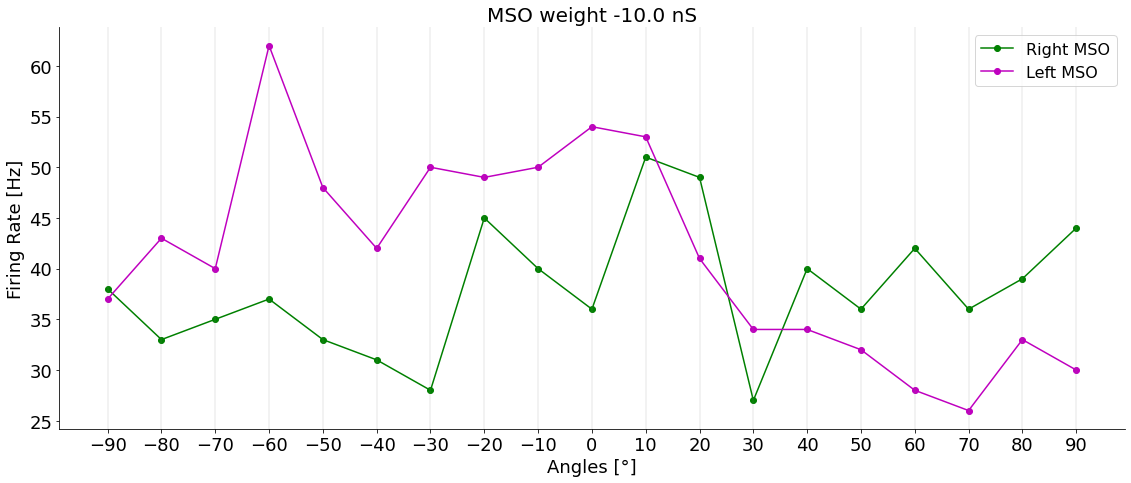

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(16,7), sharex=True)
w = 5

ax.set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
ax.set_ylabel("Firing Rate [Hz]")


ax.plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
ax.plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

for i in range(len(angles)):
    ax.axvline(angles[i], linewidth = 0.2, color = 'grey')

ax.set_xlabel("Angles [°]")
ax.set_xticks(angles)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

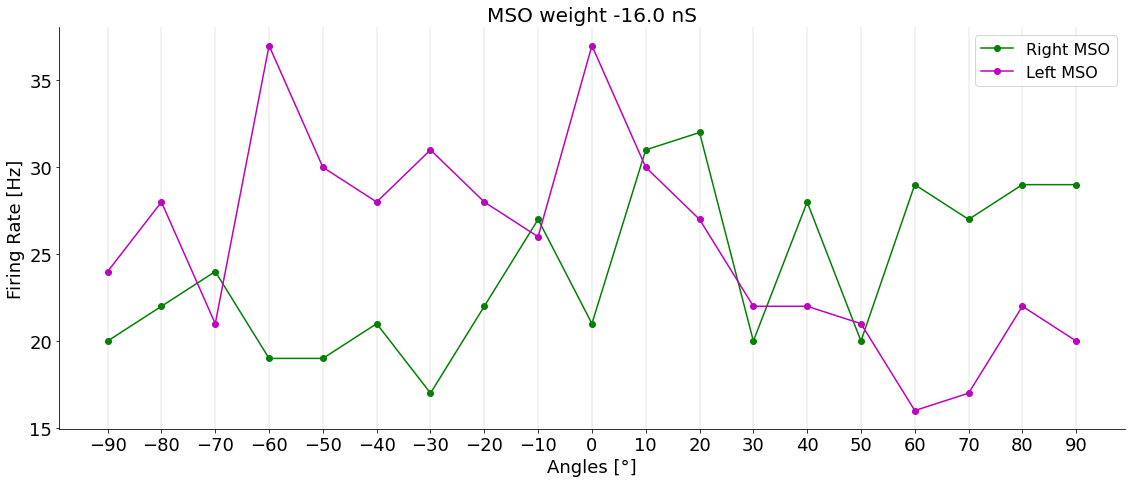

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(16,7), sharex=True)
w = 8

ax.set_title("MSO weight {} nS".format(MNTBCs2MSO_weights[w]))
ax.set_ylabel("Firing Rate [Hz]")


ax.plot(angles,np.loadtxt(path_r)[w,:],"o-g",label = "Right MSO")
ax.plot(angles,np.loadtxt(path_l)[w,:],"o-m", label = "Left MSO")

for i in range(len(angles)):
    ax.axvline(angles[i], linewidth = 0.2, color = 'grey')

ax.set_xlabel("Angles [°]")
ax.set_xticks(angles)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

In [40]:
r_ANFs = nest.Create('parrot_neuron', 1)

l_ANFs = nest.Create('parrot_neuron',1)

nest.Connect(r_ANFs, l_ANFs)

In [42]:
nest.GetConnections()